In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

# 근골격기능

In [236]:
df_1_1 = pd.read_csv('../03.근골격기능/output/근골격기능_뼈기능.csv', index_col=0)
df_1_2 = pd.read_csv('../03.근골격기능/output/근골격기능_근육유지기능.csv', index_col=0)
df_1_3 = pd.read_csv('../03.근골격기능/output/근골격기능_체지방조절기능.csv', index_col=0)

In [237]:
target = '근골격기능'

In [238]:
target_col = '뼈기능_예측지수'
target_col2 = '근육유지기능_예측지수'
target_col3 = '체지방조절기능_예측지수'

## 중요도 ratio

In [239]:
target_cols_ratio = [2, 4, 4]

In [240]:
df_1_1.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
0,2010,7282,2520,1,42,63.0,-0.41,-0.2,0.13,21.73,3.05,4.10,0.36,97.0,42.6
1,2010,7490,3638,1,39,164.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0,40.4
2,2010,7915,3997,1,36,184.0,-0.41,-0.2,0.13,21.73,3.05,3.50,0.36,92.0,37.6
3,2010,8056,4745,1,42,165.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0,43.4
4,2010,8457,3929,1,38,147.0,-0.41,-0.2,0.13,21.73,3.05,2.60,0.36,82.0,41.6


In [241]:
df_1_2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,7282,2520,1,42,50.37,7.6,165.0,100.0,42.0
1,2010,7490,3638,1,39,50.37,6.9,262.0,83.0,42.4
2,2010,7915,3997,1,36,50.37,7.3,241.0,90.0,38.0
3,2010,8056,4745,1,42,50.37,7.2,262.0,89.0,44.2
4,2010,8457,3929,1,38,50.37,7.6,262.0,84.0,41.2


In [242]:
df_1_3.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,예측지수,예측나이
0,2010,8056,4745,1,42,80.0,24.97,0.90,18.16,101.0,41.8
1,2010,15783,1431,1,41,96.0,32.10,0.90,18.16,86.0,43.8
2,2011,123463,10799,1,39,86.0,23.10,0.90,18.16,109.0,37.2
3,2011,135154,6627,1,28,100.0,24.20,0.89,18.80,97.0,28.6
4,2010,16844,4411,1,37,85.0,24.97,0.90,18.16,106.0,35.8


In [243]:
df_1_1.rename(columns={'예측지수':target_col}, inplace=True)
df_1_2.rename(columns={'예측지수':target_col2}, inplace=True)
df_1_3.rename(columns={'예측지수':target_col3}, inplace=True)

In [244]:
df_1_1.rename(columns={'예측나이':'뼈기능_예측나이'}, inplace=True)
df_1_2.rename(columns={'예측나이':'근육유지기능_예측나이'}, inplace=True)
df_1_3.rename(columns={'예측나이':'체지방조절기능_예측나이'}, inplace=True)

## join

In [245]:
df_1 = pd.merge(df_1_1, df_1_2, on=['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이'], how='inner')
df_1 = pd.merge(df_1, df_1_3, on=['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이'], how='inner')

In [246]:
df_1.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이
0,2010,8056,4745,1,42,165.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0,43.4,50.37,7.2,262.00,89.0,44.2,80.0,24.97,0.90,18.16,101.0,41.8
1,2010,15783,1431,1,41,40.0,-0.41,1.0,0.13,21.73,9.40,3.52,0.36,98.0,41.4,50.37,7.1,167.26,108.0,39.4,96.0,32.10,0.90,18.16,86.0,43.8
2,2011,135154,6627,1,28,64.0,-0.41,-0.2,0.13,21.73,3.05,3.20,0.36,99.0,28.2,53.60,7.6,151.00,105.0,27.0,100.0,24.20,0.89,18.80,97.0,28.6
3,2010,16844,4411,1,37,253.0,-0.41,-0.2,0.13,21.73,3.05,4.20,0.36,81.0,40.8,50.37,7.2,262.00,89.0,39.2,85.0,24.97,0.90,18.16,106.0,35.8
4,2010,34284,577,1,44,182.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0,45.4,50.37,7.2,167.26,109.0,42.2,98.0,28.80,0.90,18.16,89.0,46.2


In [247]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091917 entries, 0 to 1091916
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1091917 non-null  int64  
 1   UID              1091917 non-null  int64  
 2   CU_REC_ID        1091917 non-null  int64  
 3   SEX              1091917 non-null  int64  
 4   검진당시나이           1091917 non-null  int64  
 5   ALP              1091917 non-null  float64
 6   골밀도검사(BMD)       1091917 non-null  float64
 7   골밀도검사(허리)        1091917 non-null  float64
 8   골밀도검사 (T-Score)  1091917 non-null  float64
 9   비타민D             1091917 non-null  float64
 10  Ca(칼슘)           1091917 non-null  float64
 11  P(인)             1091917 non-null  float64
 12  T-Score          1091917 non-null  float64
 13  뼈기능_예측지수         1091917 non-null  float64
 14  뼈기능_예측나이         1091917 non-null  float64
 15  체근육량             1091917 non-null  float64
 16  총단백 (T-Protein)  1

## 스크리닝 50미만 150이상

In [248]:
min_value = 50
max_value = 150

### 뼈기능_예측지수

In [249]:
df_1[df_1[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [250]:
df_1.loc[df_1[target_col] < min_value, target_col] = min_value

In [251]:
df_1[df_1[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [252]:
df_1[df_1[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [253]:
df_1.loc[df_1[target_col] > max_value, target_col] = max_value

In [254]:
df_1[df_1[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


### 근육유지기능_예측지수

In [255]:
df_1[df_1[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [256]:
df_1.loc[df_1[target_col2] < min_value, target_col2] = min_value

In [257]:
df_1[df_1[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [258]:
df_1[df_1[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [259]:
df_1.loc[df_1[target_col2] > max_value, target_col2] = max_value

In [260]:
df_1[df_1[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


### 근육유지기능_예측지수

In [261]:
df_1[df_1[target_col3] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이
136638,2021,117425,619733,1,27,251.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,92.0,28.6,54.3,7.2,183.0,106.0,25.8,101.80,33.375,1.04,34.15,49.0,37.2
189608,2021,374902,645336,1,28,193.0,-0.41,-0.2,0.13,21.73,3.05,3.80,0.36,90.0,30.0,64.5,7.8,164.0,117.0,24.6,110.00,33.375,1.04,34.15,48.0,38.4
228149,2022,117425,959594,1,28,253.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,91.0,29.8,53.4,7.1,171.0,110.0,26.0,106.30,33.375,1.04,34.15,49.0,38.2
341669,2022,808282,986995,1,29,58.0,-0.41,-0.2,0.13,21.73,3.05,3.60,0.36,102.0,28.6,67.4,7.5,170.0,127.0,23.6,109.00,32.400,1.04,34.15,49.0,39.2
370915,2022,886742,1283325,1,29,253.0,-0.41,-0.2,0.13,7.05,3.05,3.10,0.36,73.0,34.4,60.9,7.5,158.0,117.0,25.6,111.75,33.375,1.04,34.15,49.0,39.2


In [262]:
df_1.loc[df_1[target_col3] < min_value, target_col3] = min_value

In [263]:
df_1[df_1[target_col3] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [264]:
df_1[df_1[target_col3] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


In [265]:
df_1.loc[df_1[target_col3] > max_value, target_col3] = max_value

In [266]:
df_1[df_1[target_col3] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이


## 근골격기능 계산

In [267]:
target_col, df_1[target_col].min(), df_1[target_col].max() 

('뼈기능_예측지수', 64.0, 114.0)

In [268]:
target_col2, df_1[target_col2].min(), df_1[target_col2].max() 

('근육유지기능_예측지수', 51.0, 137.0)

In [269]:
target_col3, df_1[target_col3].min(), df_1[target_col3].max() 

('체지방조절기능_예측지수', 50.0, 129.0)

In [270]:
df_1[target] = (
      (target_cols_ratio[0] * df_1[target_col])
    + (target_cols_ratio[1] * df_1[target_col2])    
    + (target_cols_ratio[2] * df_1[target_col3])    
) / sum(target_cols_ratio)

In [271]:
df_1[target] = np.round(df_1[target], 2)

In [272]:
df_1[target].min()

62.8

In [273]:
df_1[target].max()

122.4

In [274]:
df_1.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이,근골격기능
count,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06
mean,2.022000e+03,5.035255e+05,1.482596e+06,1.365899e+00,4.097648e+01,9.587003e+01,-3.552578e-01,1.006008e+00,1.655938e-01,1.837328e+01,4.257507e+00,3.640919e+00,-2.546097e-01,9.239267e+01,4.249795e+01,4.445841e+01,7.210009e+00,1.743325e+02,9.688210e+01,4.160006e+01,8.136787e+01,2.397744e+01,8.817307e-01,1.801944e+01,1.017850e+02,4.061948e+01,9.794539e+01
std,1.547542e+00,3.612310e+05,7.989313e+05,4.816815e-01,8.830300e+00,5.919019e+01,3.197645e+00,1.089631e+01,3.764403e-01,5.894505e+00,2.477506e+00,1.507476e+00,8.221552e-01,7.257193e+00,9.055091e+00,8.989648e+00,4.342042e-01,3.867166e+01,1.022653e+01,8.971163e+00,1.059580e+01,3.513264e+00,3.674338e-02,3.063999e+00,1.234267e+01,9.077013e+00,6.551704e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.000000e+01,-1.300000e+01,-5.400000e+00,-4.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.900000e+00,6.400000e+01,1.820000e+01,7.550000e+00,6.000000e+00,7.800000e+01,5.100000e+01,1.440000e+01,4.975000e+01,1.421500e+01,7.200000e-01,1.750000e+00,5.000000e+01,1.560000e+01,6.280000e+01
25%,2.021000e+03,2.205950e+05,6.652430e+05,1.000000e+00,3.400000e+01,5.400000e+01,-5.400000e-01,-2.000000e-01,1.300000e-01,2.089000e+01,3.050000e+00,3.400000e+00,-1.330000e+00,8.700000e+01,3.540000e+01,3.411000e+01,6.900000e+00,1.510000e+02,9.000000e+01,3.480000e+01,7.300000e+01,2.150000e+01,8.500000e-01,1.741000e+01,9.500000e+01,3.380000e+01,9.380000e+01
50%,2.022000e+03,3.786990e+05,1.389538e+06,1.000000e+00,4.000000e+01,7.000000e+01,-4.100000e-01,-2.000000e-01,1.300000e-01,2.089000e+01,3.050000e+00,3.520000e+00,3.600000e-01,9.200000e+01,4.200000e+01,5.037000e+01,7.200000e+00,1.672600e+02,9.800000e+01,4.120000e+01,8.200000e+01,2.380000e+01,9.000000e-01,1.816000e+01,1.050000e+02,4.020000e+01,9.860000e+01
75%,2.023000e+03,8.269370e+05,2.174000e+06,2.000000e+00,4.800000e+01,1.300000e+02,-4.100000e-01,-1.500000e-01,2.300000e-01,2.173000e+01,3.050000e+00,3.800000e+00,3.600000e-01,9.800000e+01,4.940000e+01,5.037000e+01,7.500000e+00,1.850000e+02,1.040000e+02,4.840000e+01,8.800000e+01,2.610000e+01,9.000000e-01,1.816000e+01,1.110000e+02,4.740000e+01,1.026000e+02
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,2.530000e+02,1.847000e+02,1.610000e+02,1.101000e+02,2.173000e+01,9.400000e+00,4.652500e+01,3.300000e+00,1.140000e+02,7.440000e+01,8.235000e+01,8.400000e+00,2.620000e+02,1.370000e+02,7.600000e+01,1.117500e+02,3.337500e+01,1.040000e+00,3.415000e+01,1.290000e+02,7.500000e+01,1.224000e+02


In [275]:
df_1.columns[5:].tolist()

['ALP',
 '골밀도검사(BMD)',
 '골밀도검사(허리)',
 '골밀도검사 (T-Score)',
 '비타민D',
 'Ca(칼슘)',
 'P(인)',
 'T-Score',
 '뼈기능_예측지수',
 '뼈기능_예측나이',
 '체근육량',
 '총단백 (T-Protein)',
 '유산탈수소효소 (LDH)',
 '근육유지기능_예측지수',
 '근육유지기능_예측나이',
 '허리둘레',
 '체질량지수(BMI)',
 '복부지방율',
 '체지방량',
 '체지방조절기능_예측지수',
 '체지방조절기능_예측나이',
 '근골격기능']

<AxesSubplot:>

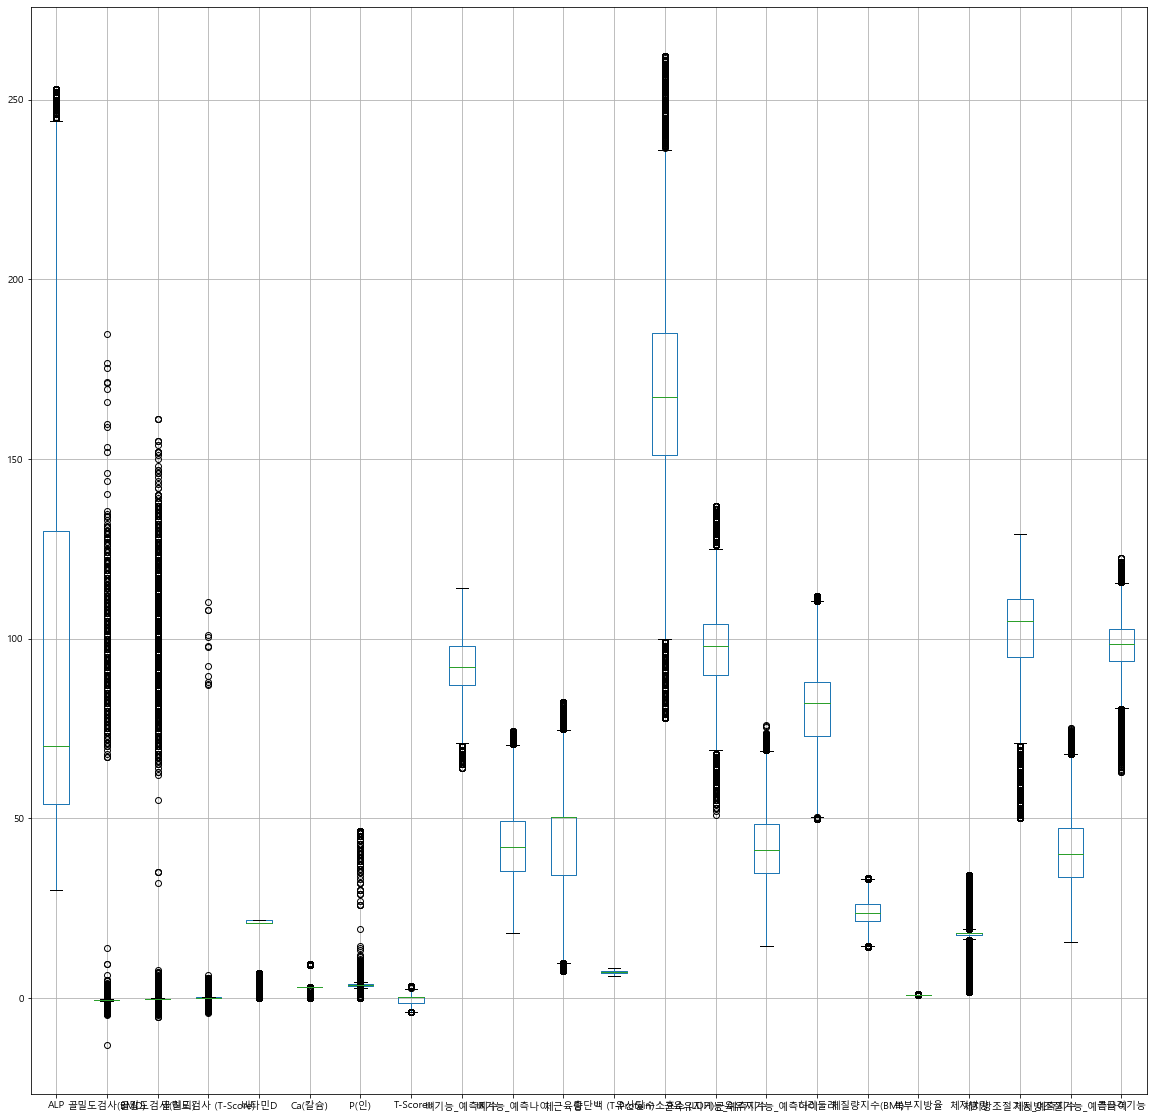

In [276]:
plt.rcParams["figure.figsize"] = (20, 20)
df_1.boxplot(column=df_1.columns[5:].tolist())

<AxesSubplot:>

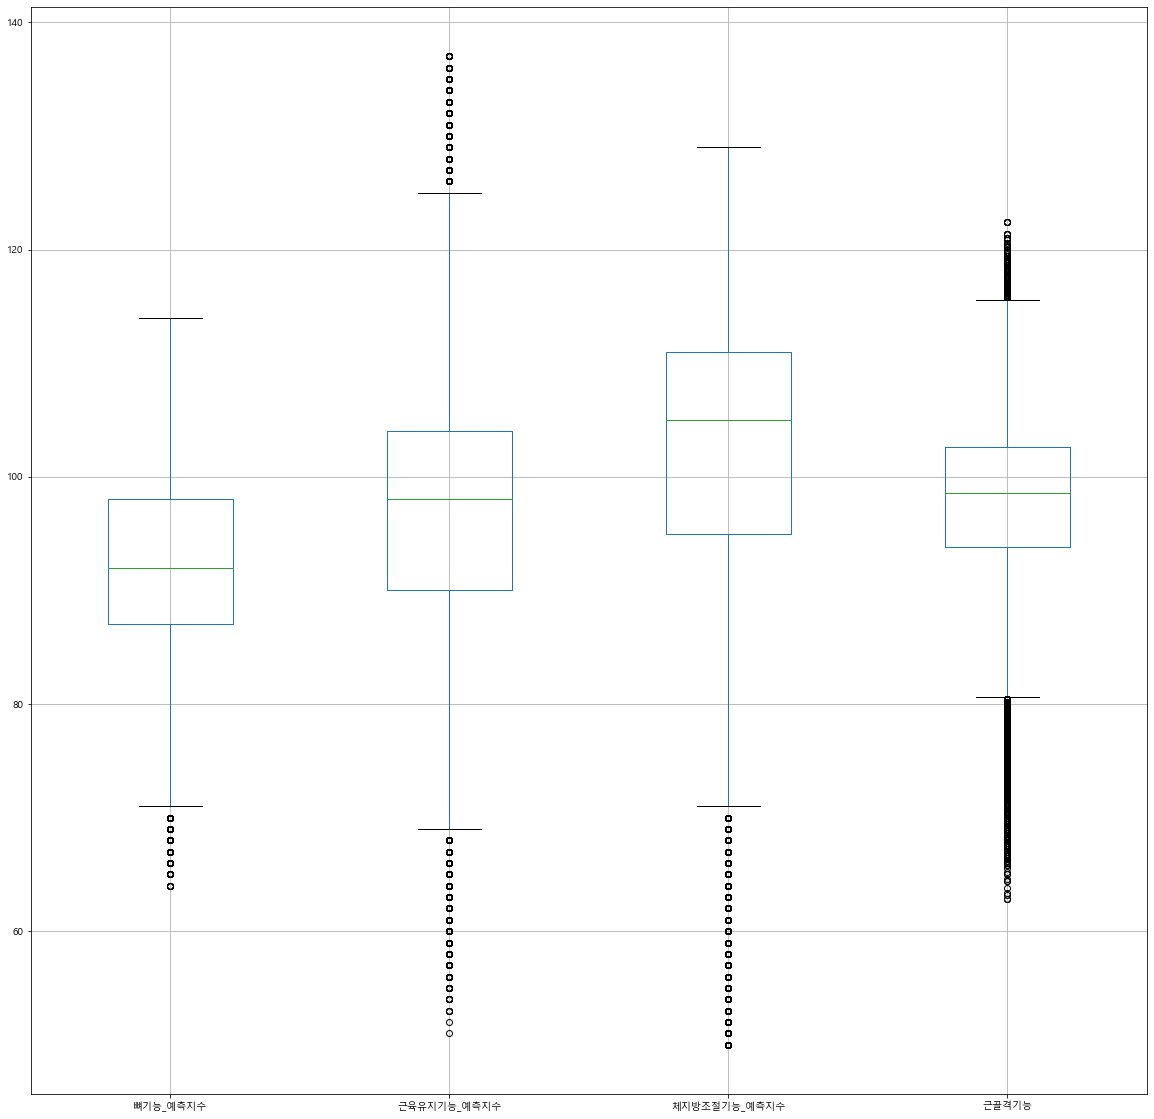

In [277]:
plt.rcParams["figure.figsize"] = (20, 20)
df_1.boxplot(column=[target_col, target_col2, target_col3, target])

In [278]:
df_1.sort_values(by=target, inplace=True)

In [279]:
df_1.reset_index(drop=True, inplace=True)

In [280]:
df_1.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이,근골격기능
0,2024,227401,2689007,1,51,134.0,-0.41,-0.20,0.13,21.73,3.05,3.1,0.36,86.0,53.8,45.3,6.2,110.0,63.0,58.4,64.00,17.100,0.76,4.30,51.0,60.8,62.8
1,2022,560647,1283541,1,47,170.0,-0.41,-0.20,0.13,21.73,3.05,3.5,0.36,88.0,49.4,42.5,6.2,211.0,62.0,54.6,65.00,16.800,0.77,4.40,51.0,56.8,62.8
2,2020,355315,438779,1,48,60.0,-0.41,-0.20,0.13,7.05,3.05,4.3,0.36,84.0,51.2,27.5,7.8,262.0,62.0,55.6,68.50,18.100,0.78,5.60,53.0,57.4,62.8
3,2019,455084,342375,1,35,40.0,-0.41,-0.20,0.13,4.50,3.05,3.8,0.36,82.0,38.6,43.4,8.1,200.0,66.0,41.8,64.50,15.200,0.72,2.50,51.0,44.8,63.2
4,2021,385707,627385,1,56,102.0,-0.41,-0.20,0.13,21.73,3.05,3.4,0.36,89.0,58.2,34.2,8.3,217.0,60.0,64.0,111.40,30.500,1.04,32.30,54.0,65.2,63.4
5,2022,804721,1189278,1,33,84.0,-0.41,-0.20,0.13,21.73,3.05,3.6,0.36,95.0,34.0,39.2,6.3,108.0,56.0,41.8,67.00,17.400,0.78,6.10,56.0,41.8,63.8
6,2022,819560,1315421,1,49,76.0,-0.41,-0.20,0.13,21.73,3.05,4.3,0.36,92.0,50.6,38.0,8.1,206.0,61.0,56.8,111.75,33.375,1.04,34.15,54.0,58.2,64.4
7,2020,194446,456815,1,44,46.0,-0.41,-0.20,0.13,21.73,3.05,3.9,0.36,94.0,45.2,45.4,6.2,256.0,61.0,51.8,67.00,16.600,0.79,3.00,53.0,53.4,64.4
8,2021,125641,650858,1,51,80.0,-0.41,-0.10,0.13,7.05,3.05,4.2,0.36,80.0,55.0,40.8,8.3,244.0,56.0,59.8,105.80,33.375,0.90,32.30,65.0,58.0,64.4
9,2019,336832,346269,2,31,92.0,-0.54,-1.90,0.23,7.05,3.05,3.4,-1.33,77.0,35.6,26.7,8.2,203.0,57.0,39.6,96.00,29.900,0.85,28.20,66.0,37.8,64.6


In [281]:
df_1.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이,근골격기능
count,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06,1.091917e+06
mean,2.022000e+03,5.035255e+05,1.482596e+06,1.365899e+00,4.097648e+01,9.587003e+01,-3.552578e-01,1.006008e+00,1.655938e-01,1.837328e+01,4.257507e+00,3.640919e+00,-2.546097e-01,9.239267e+01,4.249795e+01,4.445841e+01,7.210009e+00,1.743325e+02,9.688210e+01,4.160006e+01,8.136787e+01,2.397744e+01,8.817307e-01,1.801944e+01,1.017850e+02,4.061948e+01,9.794539e+01
std,1.547542e+00,3.612310e+05,7.989313e+05,4.816815e-01,8.830300e+00,5.919019e+01,3.197645e+00,1.089631e+01,3.764403e-01,5.894505e+00,2.477506e+00,1.507476e+00,8.221552e-01,7.257193e+00,9.055091e+00,8.989648e+00,4.342042e-01,3.867166e+01,1.022653e+01,8.971163e+00,1.059580e+01,3.513264e+00,3.674338e-02,3.063999e+00,1.234267e+01,9.077013e+00,6.551704e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.000000e+01,-1.300000e+01,-5.400000e+00,-4.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.900000e+00,6.400000e+01,1.820000e+01,7.550000e+00,6.000000e+00,7.800000e+01,5.100000e+01,1.440000e+01,4.975000e+01,1.421500e+01,7.200000e-01,1.750000e+00,5.000000e+01,1.560000e+01,6.280000e+01
25%,2.021000e+03,2.205950e+05,6.652430e+05,1.000000e+00,3.400000e+01,5.400000e+01,-5.400000e-01,-2.000000e-01,1.300000e-01,2.089000e+01,3.050000e+00,3.400000e+00,-1.330000e+00,8.700000e+01,3.540000e+01,3.411000e+01,6.900000e+00,1.510000e+02,9.000000e+01,3.480000e+01,7.300000e+01,2.150000e+01,8.500000e-01,1.741000e+01,9.500000e+01,3.380000e+01,9.380000e+01
50%,2.022000e+03,3.786990e+05,1.389538e+06,1.000000e+00,4.000000e+01,7.000000e+01,-4.100000e-01,-2.000000e-01,1.300000e-01,2.089000e+01,3.050000e+00,3.520000e+00,3.600000e-01,9.200000e+01,4.200000e+01,5.037000e+01,7.200000e+00,1.672600e+02,9.800000e+01,4.120000e+01,8.200000e+01,2.380000e+01,9.000000e-01,1.816000e+01,1.050000e+02,4.020000e+01,9.860000e+01
75%,2.023000e+03,8.269370e+05,2.174000e+06,2.000000e+00,4.800000e+01,1.300000e+02,-4.100000e-01,-1.500000e-01,2.300000e-01,2.173000e+01,3.050000e+00,3.800000e+00,3.600000e-01,9.800000e+01,4.940000e+01,5.037000e+01,7.500000e+00,1.850000e+02,1.040000e+02,4.840000e+01,8.800000e+01,2.610000e+01,9.000000e-01,1.816000e+01,1.110000e+02,4.740000e+01,1.026000e+02
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,2.530000e+02,1.847000e+02,1.610000e+02,1.101000e+02,2.173000e+01,9.400000e+00,4.652500e+01,3.300000e+00,1.140000e+02,7.440000e+01,8.235000e+01,8.400000e+00,2.620000e+02,1.370000e+02,7.600000e+01,1.117500e+02,3.337500e+01,1.040000e+00,3.415000e+01,1.290000e+02,7.500000e+01,1.224000e+02


In [282]:
df_1.reset_index(drop=True, inplace=True)

In [283]:
df_1[df_1['CU_REC_ID'] == 2818272]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,뼈기능_예측지수,뼈기능_예측나이,체근육량,총단백 (T-Protein),유산탈수소효소 (LDH),근육유지기능_예측지수,근육유지기능_예측나이,허리둘레,체질량지수(BMI),복부지방율,체지방량,체지방조절기능_예측지수,체지방조절기능_예측나이,근골격기능
1078597,2024,1460242,2818272,2,52,67.0,-0.54,-0.15,0.23,7.05,3.05,4.1,-1.33,94.0,53.2,34.11,7.0,166.0,106.0,50.8,77.0,22.5,0.89,17.41,123.0,47.4,110.4


In [53]:
df_1[:1048576].to_excel('./output/근골격기능.xlsx')
# df_1.to_excel('./output/근골격기능.xlsx')

In [54]:
df_1.to_csv('./output/근골격기능.csv')

# 내분비기능

In [83]:
df_2_1 = pd.read_csv('../04.내분비기능/output/내분비기능_갑상선기능.csv', index_col=0)
df_2_2 = pd.read_csv('../04.내분비기능/output/내분비기능_췌장인슐린분비.csv', index_col=0)

In [84]:
target = '내분비기능'

In [85]:
target_col = '갑상선기능_예측지수'
target_col2 = '췌장인슐린분비_예측지수'

## 중요도 ratio

In [86]:
target_cols_ratio = [4, 4]

In [87]:
df_2_1.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
0,2010,7282,2520,1,42,2.560,1.29,1.06,NaN,1.0,95.0,43.0
1,2010,7490,3638,1,39,2.900,1.39,30.81,정상,0.0,98.0,39.4
2,2010,7915,3997,1,36,0.918,1.29,1.16,NaN,1.0,104.0,35.2
3,2010,8056,4745,1,42,1.200,1.29,30.81,정상,0.0,108.0,40.4
4,2010,8457,3929,1,38,1.317,1.29,1.13,NaN,1.0,108.0,36.4


In [88]:
df_2_2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,예측지수,예측나이
0,2010,7282,2520,1,42,83.0,98.0,5.46,8.31,97.0,42.6
1,2010,7490,3638,1,39,120.5,103.0,5.46,8.73,93.0,40.4
2,2010,7915,3997,1,36,104.0,268.0,5.46,9.54,83.0,39.4
3,2010,8056,4745,1,42,89.0,268.0,5.46,9.39,96.0,42.8
4,2010,8457,3929,1,38,120.5,154.0,5.46,9.14,85.0,41.0


In [89]:
df_2_1.rename(columns={'예측지수':target_col}, inplace=True)
df_2_2.rename(columns={'예측지수':target_col2}, inplace=True)

In [90]:
df_2_1.rename(columns={'예측나이':'갑상선기능_예측나이'}, inplace=True)
df_2_2.rename(columns={'예측나이':'췌장인슐린분비_예측나이'}, inplace=True)

## join

In [91]:
df_2 = pd.merge(df_2_1, df_2_2, on=['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이'], how='inner')

In [92]:
df_2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이
0,2010,7282,2520,1,42,2.560,1.29,1.06,NaN,1.0,95.0,43.0,83.0,98.0,5.46,8.31,97.0,42.6
1,2010,7490,3638,1,39,2.900,1.39,30.81,정상,0.0,98.0,39.4,120.5,103.0,5.46,8.73,93.0,40.4
2,2010,7915,3997,1,36,0.918,1.29,1.16,NaN,1.0,104.0,35.2,104.0,268.0,5.46,9.54,83.0,39.4
3,2010,8056,4745,1,42,1.200,1.29,30.81,정상,0.0,108.0,40.4,89.0,268.0,5.46,9.39,96.0,42.8
4,2010,8457,3929,1,38,1.317,1.29,1.13,NaN,1.0,108.0,36.4,120.5,154.0,5.46,9.14,85.0,41.0


In [93]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090686 entries, 0 to 1090685
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1090686 non-null  int64  
 1   UID                         1090686 non-null  int64  
 2   CU_REC_ID                   1090686 non-null  int64  
 3   SEX                         1090686 non-null  int64  
 4   검진당시나이                      1090686 non-null  int64  
 5   갑상선자극호르몬 (TSH)              1090686 non-null  float64
 6   Free T4                     1090686 non-null  float64
 7   T3                          1090686 non-null  float64
 8   갑상선초음파 (Thyroid Sono)_text  605379 non-null   object 
 9   갑상선초음파                      1090686 non-null  float64
 10  갑상선기능_예측지수                  1090686 non-null  float64
 11  갑상선기능_예측나이                  1090686 non-null  float64
 12  공복시혈당(FBS)                  1090686 non-null  float64
 1

## 스크리닝 50미만 150이상

In [94]:
min_value = 50
max_value = 150

### 갑상선기능_예측지수

In [95]:
df_2[df_2[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


In [96]:
df_2.loc[df_2[target_col] < min_value, target_col] = min_value

In [97]:
df_2[df_2[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


In [99]:
df_2[df_2[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


In [100]:
df_2.loc[df_2[target_col] > max_value, target_col] = max_value

In [101]:
df_2[df_2[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


### 췌장인슐린분비_예측지수

In [102]:
df_2[df_2[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이
39662,2019,334082,400759,1,27,1.140,1.02,30.81,정상,0.0,101.0,26.8,120.5,268.0,6.45,9.69,49.0,37.2
83680,2020,190215,443023,1,21,1.160,1.86,30.81,NaN,1.0,87.0,23.6,120.5,266.0,6.45,9.68,48.0,31.4
154845,2021,179696,577588,1,27,1.050,1.28,30.81,NaN,1.0,107.0,25.6,120.5,268.0,6.45,9.69,49.0,37.2
317668,2022,459990,798881,1,27,1.430,1.23,30.81,NaN,1.0,105.0,26.0,120.5,268.0,6.45,9.69,49.0,37.2
409811,2023,190215,1949817,1,24,1.068,0.97,30.81,NaN,1.0,103.0,23.4,120.5,268.0,6.45,9.69,49.0,34.2


In [103]:
df_2.loc[df_2[target_col2] < min_value, target_col2] = min_value

In [104]:
df_2[df_2[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


In [105]:
df_2[df_2[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


In [106]:
df_2.loc[df_2[target_col2] > max_value, target_col2] = max_value

In [107]:
df_2[df_2[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이


## 내분비기능 계산

In [108]:
target_col, df_2[target_col].min(), df_2[target_col].max() 

('갑상선기능_예측지수', 56.0, 118.0)

In [109]:
target_col2, df_2[target_col2].min(), df_2[target_col2].max() 

('췌장인슐린분비_예측지수', 50.0, 139.0)

In [110]:
df_2[target] = (
      (target_cols_ratio[0] * df_2[target_col])
    + (target_cols_ratio[1] * df_2[target_col2])          
) / sum(target_cols_ratio)

In [111]:
df_2[target] = np.round(df_2[target], 2)

In [112]:
df_2[target].min()

56.5

In [113]:
df_2[target].max()

123.0

In [114]:
df_2.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이,내분비기능
count,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1090686.00,1.090686e+06,1.090686e+06,1.090686e+06
mean,2.021970e+03,4.991369e+05,1.467737e+06,1.367276e+00,4.099051e+01,1.849829e+00,1.267004e+00,3.040358e+01,1.366472e+00,9.801244e+01,4.138802e+01,9.547954e+01,1.155239e+02,5.455387e+00,-inf,9.937680e+01,4.111515e+01,9.869462e+01
std,1.575236e+00,3.587893e+05,8.006492e+05,4.820629e-01,8.806144e+00,9.752398e-01,2.103293e-01,2.701106e+01,1.597273e+00,9.061991e+00,9.090850e+00,1.071571e+01,6.275691e+01,3.292007e-01,NaN,1.416452e+01,9.541495e+00,8.498076e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,6.600000e-01,0.000000e+00,0.000000e+00,5.600000e+01,1.720000e+01,6.850000e+01,0.000000e+00,4.450000e+00,-inf,5.000000e+01,1.420000e+01,5.650000e+01
25%,2.021000e+03,2.196150e+05,6.571082e+05,1.000000e+00,3.400000e+01,1.140000e+00,1.130000e+00,2.923000e+01,0.000000e+00,9.200000e+01,3.440000e+01,8.800000e+01,6.800000e+01,5.300000e+00,8.04,9.100000e+01,3.380000e+01,9.350000e+01
50%,2.022000e+03,3.766795e+05,1.376714e+06,1.000000e+00,4.000000e+01,1.660000e+00,1.280000e+00,3.081000e+01,1.000000e+00,9.900000e+01,4.080000e+01,9.400000e+01,9.800000e+01,5.460000e+00,8.45,1.020000e+02,4.060000e+01,9.950000e+01
75%,2.023000e+03,8.247820e+05,2.154721e+06,2.000000e+00,4.800000e+01,2.360000e+00,1.400000e+00,3.081000e+01,1.000000e+00,1.050000e+02,4.820000e+01,1.010000e+02,1.470000e+02,5.520000e+00,8.89,1.100000e+02,4.820000e+01,1.050000e+02
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,4.255000e+00,1.860000e+00,2.052500e+02,1.000000e+01,1.180000e+02,7.600000e+01,1.205000e+02,2.680000e+02,6.450000e+00,9.69,1.390000e+02,7.720000e+01,1.230000e+02


In [115]:
df_2.columns[5:].tolist()

['갑상선자극호르몬 (TSH)',
 'Free T4',
 'T3',
 '갑상선초음파 (Thyroid Sono)_text',
 '갑상선초음파',
 '갑상선기능_예측지수',
 '갑상선기능_예측나이',
 '공복시혈당(FBS)',
 '중성지방(TG)',
 '당화혈색소 (HbA1c)',
 'TyG',
 '췌장인슐린분비_예측지수',
 '췌장인슐린분비_예측나이',
 '내분비기능']

In [134]:
lst = df_2.columns[5:].tolist()

In [135]:
lst.remove('갑상선초음파 (Thyroid Sono)_text')

<AxesSubplot:>

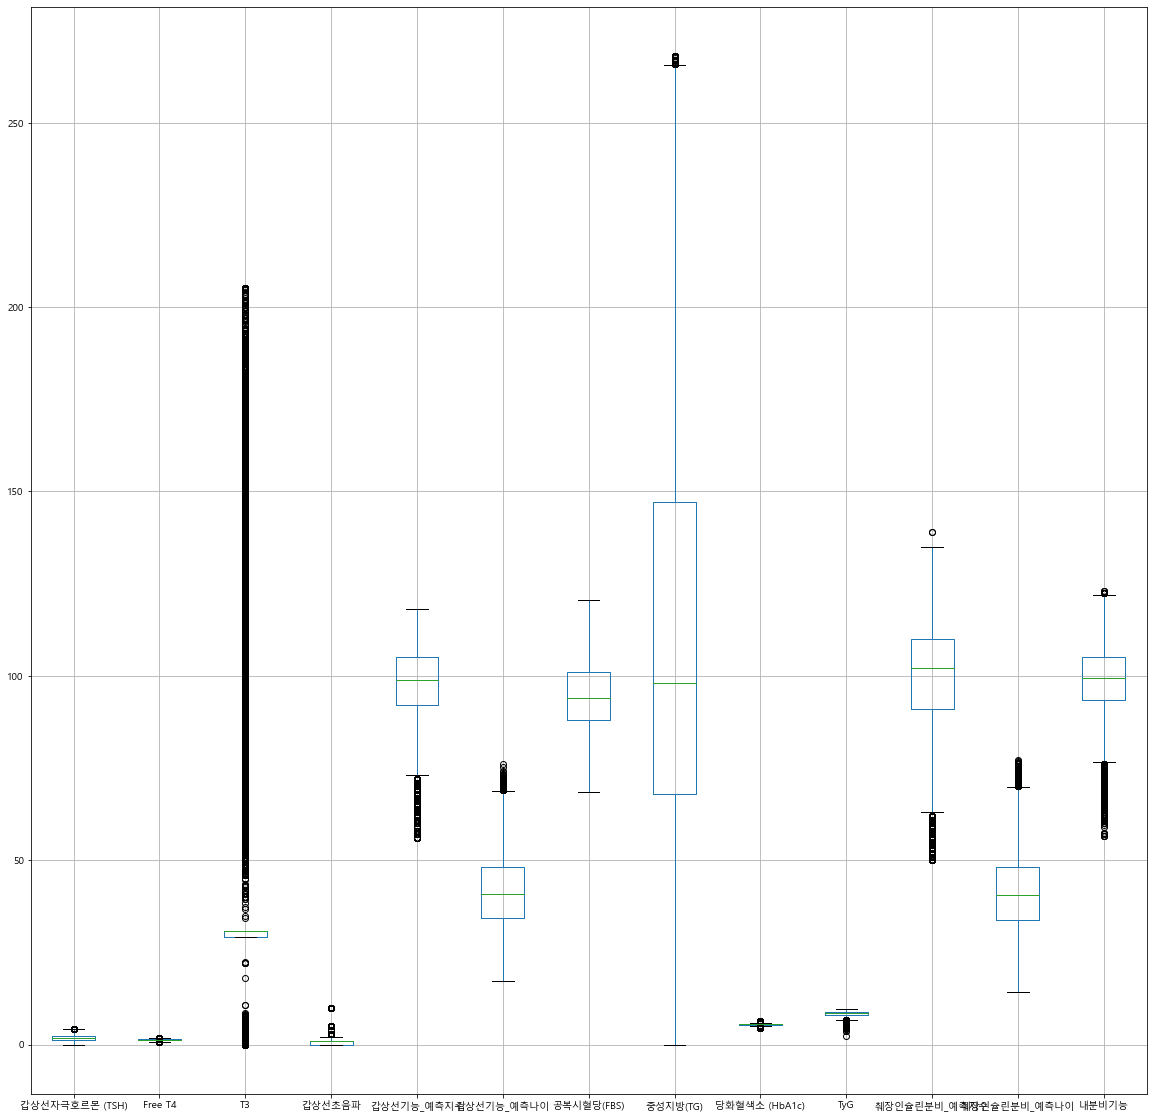

In [136]:
plt.rcParams["figure.figsize"] = (20, 20)
df_2.boxplot(column=lst)

<AxesSubplot:>

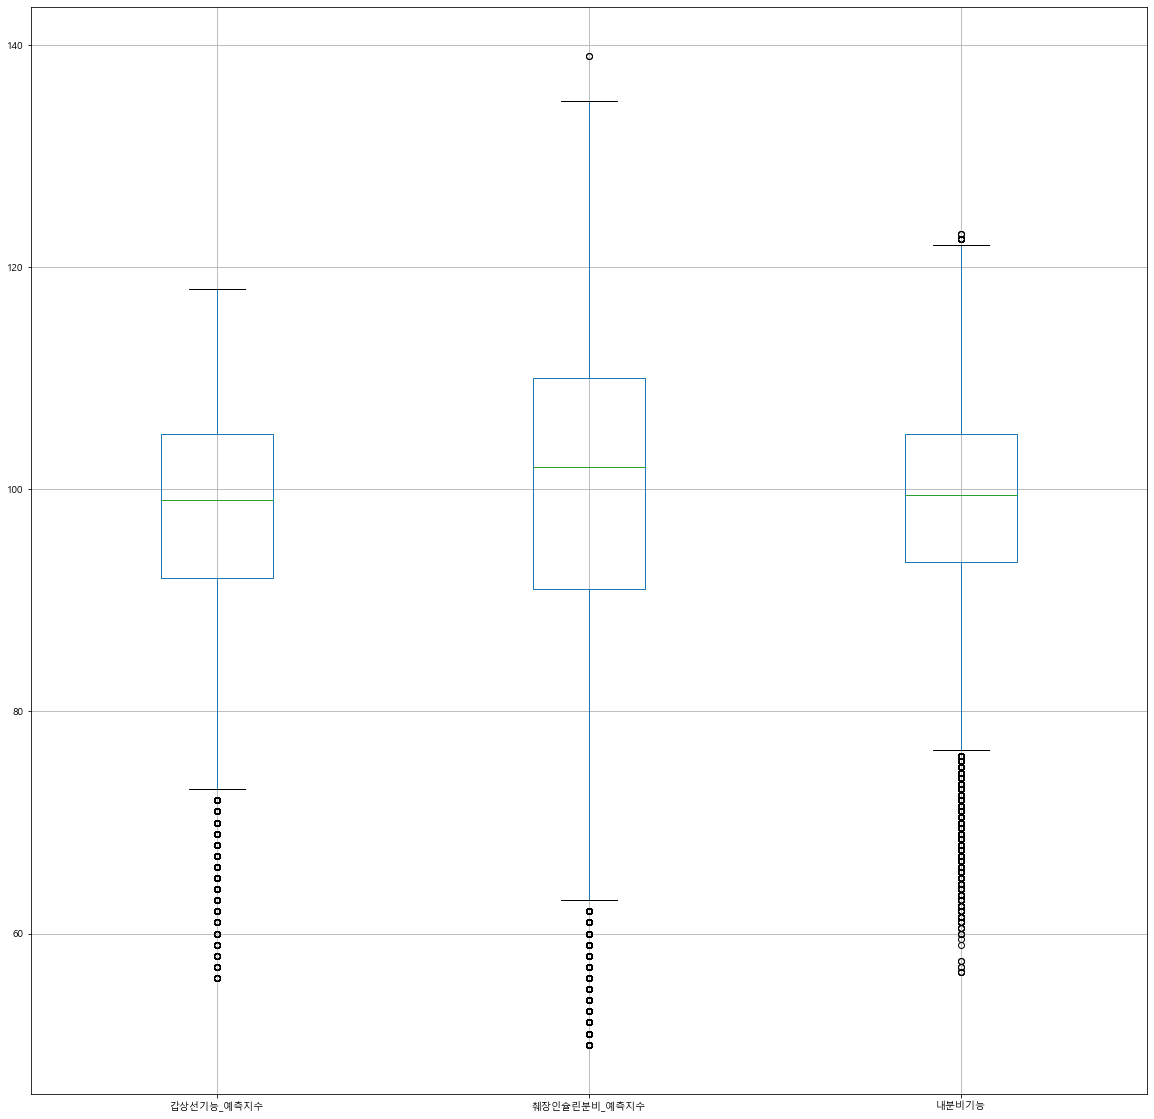

In [137]:
plt.rcParams["figure.figsize"] = (20, 20)
df_2.boxplot(column=[target_col, target_col2, target])

In [138]:
df_2.sort_values(by=target, inplace=True)

In [139]:
df_2.reset_index(drop=True, inplace=True)

In [140]:
df_2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이,내분비기능
0,2023,1120927,2359373,2,44,0.005,1.86,196.50,"갑상선낭종,갑상선결절",5.0,56.0,52.8,120.5,135.0,6.45,9.00,57.0,52.6,56.5
1,2023,1120927,2360072,2,44,0.005,1.86,196.50,"갑상선낭종,갑상선결절",5.0,56.0,52.8,120.5,135.0,6.45,9.00,57.0,52.6,56.5
2,2023,1120927,2360807,2,44,0.005,1.86,196.50,"갑상선낭종,갑상선결절",5.0,56.0,52.8,120.5,135.0,6.45,9.00,57.0,52.6,56.5
3,2023,1120927,1993704,2,44,0.005,1.86,196.50,"갑상선낭종,갑상선결절",5.0,56.0,52.8,120.5,135.0,6.45,9.00,57.0,52.6,56.5
4,2020,466117,439276,1,37,4.255,0.76,128.20,갑상선질환의심,3.0,61.0,44.8,120.5,268.0,6.45,9.69,53.0,46.4,57.0
5,2021,466117,589133,1,38,4.255,0.73,124.30,갑상선염의심,3.0,62.0,45.6,120.0,268.0,6.45,9.69,52.0,47.6,57.0
6,2024,1093756,2835786,1,39,4.255,0.66,78.00,NaN,1.0,62.0,46.6,120.5,268.0,6.45,9.69,53.0,48.4,57.5
7,2020,135591,442233,1,44,0.005,1.86,199.00,NaN,1.0,61.0,51.8,120.5,268.0,6.45,9.69,54.0,53.2,57.5
8,2023,295994,2037275,1,53,4.255,0.72,77.90,NaN,1.0,62.0,60.6,120.5,248.0,6.45,9.61,56.0,61.8,59.0
9,2021,302936,686682,1,40,0.110,1.80,122.00,NaN,1.0,64.0,47.2,120.5,237.0,6.45,9.57,55.0,49.0,59.5


In [141]:
df_2.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선기능_예측지수,갑상선기능_예측나이,공복시혈당(FBS),중성지방(TG),당화혈색소 (HbA1c),TyG,췌장인슐린분비_예측지수,췌장인슐린분비_예측나이,내분비기능
count,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1.090686e+06,1090686.00,1.090686e+06,1.090686e+06,1.090686e+06
mean,2.021970e+03,4.991369e+05,1.467737e+06,1.367276e+00,4.099051e+01,1.849829e+00,1.267004e+00,3.040358e+01,1.366472e+00,9.801244e+01,4.138802e+01,9.547954e+01,1.155239e+02,5.455387e+00,-inf,9.937680e+01,4.111515e+01,9.869462e+01
std,1.575236e+00,3.587893e+05,8.006492e+05,4.820629e-01,8.806144e+00,9.752398e-01,2.103293e-01,2.701106e+01,1.597273e+00,9.061991e+00,9.090850e+00,1.071571e+01,6.275691e+01,3.292007e-01,NaN,1.416452e+01,9.541495e+00,8.498076e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,6.600000e-01,0.000000e+00,0.000000e+00,5.600000e+01,1.720000e+01,6.850000e+01,0.000000e+00,4.450000e+00,-inf,5.000000e+01,1.420000e+01,5.650000e+01
25%,2.021000e+03,2.196150e+05,6.571082e+05,1.000000e+00,3.400000e+01,1.140000e+00,1.130000e+00,2.923000e+01,0.000000e+00,9.200000e+01,3.440000e+01,8.800000e+01,6.800000e+01,5.300000e+00,8.04,9.100000e+01,3.380000e+01,9.350000e+01
50%,2.022000e+03,3.766795e+05,1.376714e+06,1.000000e+00,4.000000e+01,1.660000e+00,1.280000e+00,3.081000e+01,1.000000e+00,9.900000e+01,4.080000e+01,9.400000e+01,9.800000e+01,5.460000e+00,8.45,1.020000e+02,4.060000e+01,9.950000e+01
75%,2.023000e+03,8.247820e+05,2.154721e+06,2.000000e+00,4.800000e+01,2.360000e+00,1.400000e+00,3.081000e+01,1.000000e+00,1.050000e+02,4.820000e+01,1.010000e+02,1.470000e+02,5.520000e+00,8.89,1.100000e+02,4.820000e+01,1.050000e+02
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,4.255000e+00,1.860000e+00,2.052500e+02,1.000000e+01,1.180000e+02,7.600000e+01,1.205000e+02,2.680000e+02,6.450000e+00,9.69,1.390000e+02,7.720000e+01,1.230000e+02


In [142]:
df_2.reset_index(drop=True, inplace=True)

In [143]:
df_2[:1048576].to_excel('./output/'+ target +'.xlsx')
# df_2.to_excel('./output/' + target + '.xlsx')

Exception ignored in: <function ZipFile.__del__ at 0x0000025D08398820>
Traceback (most recent call last):
  File "C:\Users\jhkim6\AppData\Local\Programs\Python\Python38\lib\zipfile.py", line 1821, in __del__
    self.close()
  File "C:\Users\jhkim6\AppData\Local\Programs\Python\Python38\lib\zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [144]:
df_2.to_csv('./output/' + target + '.csv')

# 해독기능

In [149]:
df_3_1 = pd.read_csv('../01.해독기능/output/해독기능_간기능.csv', index_col=0)
df_3_2 = pd.read_csv('../01.해독기능/output/해독기능_담즙배설기능.csv', index_col=0)

In [150]:
target = '해독기능'

In [151]:
target_col = '간기능_예측지수'
target_col2 = '담즙배설기능_예측지수'

## 중요도 ratio

In [152]:
target_cols_ratio = [4, 3]

In [153]:
df_3_1.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,104.0,41.2
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0,66.0,45.8
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,80.0,40.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0,59.0,50.2
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0,80.0,42.0


In [154]:
df_3_2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,예측지수,예측나이
0,2010,7282,2520,1,42,1.7,0.30,0.63,74.0,47.2
1,2010,7490,3638,1,39,0.9,0.30,0.60,95.0,40.0
2,2010,7915,3997,1,36,1.4,0.25,0.63,80.0,40.0
3,2010,8056,4745,1,42,0.7,0.20,0.63,102.0,41.6
4,2010,8457,3929,1,38,1.8,0.25,0.63,76.0,42.8


In [155]:
df_3_1.rename(columns={'예측지수':target_col}, inplace=True)
df_3_2.rename(columns={'예측지수':target_col2}, inplace=True)

In [156]:
df_3_1.rename(columns={'예측나이':'간기능_예측나이'}, inplace=True)
df_3_2.rename(columns={'예측나이':'담즙배설기능_예측나이'}, inplace=True)

## join

In [158]:
df_3 = pd.merge(df_3_1, df_3_2, on=['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이'], how='inner')

In [159]:
df_3.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,104.0,41.2,1.7,0.30,0.63,74.0,47.2
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0,66.0,45.8,0.9,0.30,0.60,95.0,40.0
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,80.0,40.0,1.4,0.25,0.63,80.0,40.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0,59.0,50.2,0.7,0.20,0.63,102.0,41.6
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0,80.0,42.0,1.8,0.25,0.63,76.0,42.8


In [160]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110351 entries, 0 to 1110350
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1110351 non-null  int64  
 1   UID            1110351 non-null  int64  
 2   CU_REC_ID      1110351 non-null  int64  
 3   SEX            1110351 non-null  int64  
 4   검진당시나이         1110351 non-null  int64  
 5   AST(SGOT)      1110351 non-null  float64
 6   ALT(SGPT)      1110351 non-null  float64
 7   ALP            1110351 non-null  float64
 8   r-GTP(GGT)     1110351 non-null  float64
 9   유산탈수소효소 (LDH)  1110351 non-null  float64
 10  간기능_예측지수       1110351 non-null  float64
 11  간기능_예측나이       1110351 non-null  float64
 12  총빌리루빈          1110351 non-null  float64
 13  직접빌리루빈         1110351 non-null  float64
 14  간접빌리루빈         1110351 non-null  float64
 15  담즙배설기능_예측지수    1110351 non-null  float64
 16  담즙배설기능_예측나이    1110351 non-null  float64
dtypes: float

## 스크리닝 50미만 150이상

In [161]:
min_value = 50
max_value = 150

### 간기능_예측지수

In [162]:
df_3[df_3[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [163]:
df_3.loc[df_3[target_col] < min_value, target_col] = min_value

In [164]:
df_3[df_3[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [165]:
df_3[df_3[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [166]:
df_3.loc[df_3[target_col] > max_value, target_col] = max_value

In [167]:
df_3[df_3[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


### 담즙배설기능_예측지수

In [168]:
df_3[df_3[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이
153494,2021,165948,566168,1,23,7.0,9.0,53.0,11.0,156.0,129.0,17.2,1.8,0.45,1.2,49.0,33.2
207092,2021,450029,601576,1,23,15.0,13.0,223.0,19.0,262.0,94.0,24.2,1.8,0.45,1.1,49.0,33.2
677053,2024,864698,2832624,1,23,40.5,38.0,180.0,15.0,157.0,74.0,28.2,1.8,0.45,1.2,49.0,33.2


In [169]:
df_3.loc[df_3[target_col2] < min_value, target_col2] = min_value

In [170]:
df_3[df_3[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [171]:
df_3[df_3[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이
841213,2021,844375,831559,2,28,15.0,11.0,54.0,13.0,131.0,103.0,27.4,0.1,0.05,0.1,151.0,17.8


In [172]:
df_3.loc[df_3[target_col2] > max_value, target_col2] = max_value

In [173]:
df_3[df_3[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


## 해독기능 계산

In [174]:
target_col, df_3[target_col].min(), df_3[target_col].max() 

('간기능_예측지수', 50.0, 141.0)

In [175]:
target_col2, df_3[target_col2].min(), df_3[target_col2].max() 

('담즙배설기능_예측지수', 50.0, 150.0)

In [176]:
df_3[target] = (
      (target_cols_ratio[0] * df_3[target_col])
    + (target_cols_ratio[1] * df_3[target_col2])          
) / sum(target_cols_ratio)

In [177]:
df_3[target] = np.round(df_3[target], 2)

In [178]:
df_3[target].min()

50.57

In [179]:
df_3[target].max()

139.86

In [180]:
df_3.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이,해독기능
count,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06
mean,2.021975e+03,5.015423e+05,1.472114e+06,1.366196e+00,4.096929e+01,2.320014e+01,2.432352e+01,9.568699e+01,2.920910e+01,1.738261e+02,8.891608e+01,4.318608e+01,8.756454e-01,2.578675e-01,6.098492e-01,9.309457e+01,4.235038e+01,9.070686e+01
std,1.568827e+00,3.602984e+05,8.006542e+05,4.817641e-01,8.830038e+00,7.584705e+00,1.373569e+01,5.905022e+01,1.900696e+01,3.863573e+01,1.540322e+01,9.433477e+00,3.458540e-01,9.807593e-02,2.398616e-01,1.872217e+01,9.613312e+00,1.223414e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.500000e+00,0.000000e+00,3.000000e+01,0.000000e+00,7.800000e+01,5.000000e+01,1.440000e+01,-1.200000e-01,5.000000e-02,-2.000000e-01,5.000000e+01,1.160000e+01,5.057000e+01
25%,2.021000e+03,2.200640e+05,6.586335e+05,1.000000e+00,3.400000e+01,1.800000e+01,1.400000e+01,5.400000e+01,1.500000e+01,1.510000e+02,7.800000e+01,3.620000e+01,6.000000e-01,2.000000e-01,5.000000e-01,8.100000e+01,3.520000e+01,8.229000e+01
50%,2.022000e+03,3.776520e+05,1.380132e+06,1.000000e+00,4.000000e+01,2.100000e+01,2.000000e+01,7.000000e+01,2.200000e+01,1.641500e+02,9.000000e+01,4.280000e+01,8.000000e-01,2.400000e-01,6.000000e-01,9.500000e+01,4.220000e+01,9.100000e+01
75%,2.023000e+03,8.259070e+05,2.168876e+06,2.000000e+00,4.800000e+01,2.700000e+01,3.100000e+01,1.290000e+02,3.800000e+01,1.840000e+02,1.000000e+02,5.020000e+01,1.080000e+00,3.000000e-01,7.000000e-01,1.050000e+02,4.940000e+01,9.929000e+01
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,4.050000e+01,5.650000e+01,2.530000e+02,7.250000e+01,2.620000e+02,1.410000e+02,7.820000e+01,1.800000e+00,4.500000e-01,1.400000e+00,1.500000e+02,7.880000e+01,1.398600e+02


In [181]:
df_3.columns[5:].tolist()

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '간기능_예측지수',
 '간기능_예측나이',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '담즙배설기능_예측지수',
 '담즙배설기능_예측나이',
 '해독기능']

In [182]:
lst = df_3.columns[5:].tolist()

<AxesSubplot:>

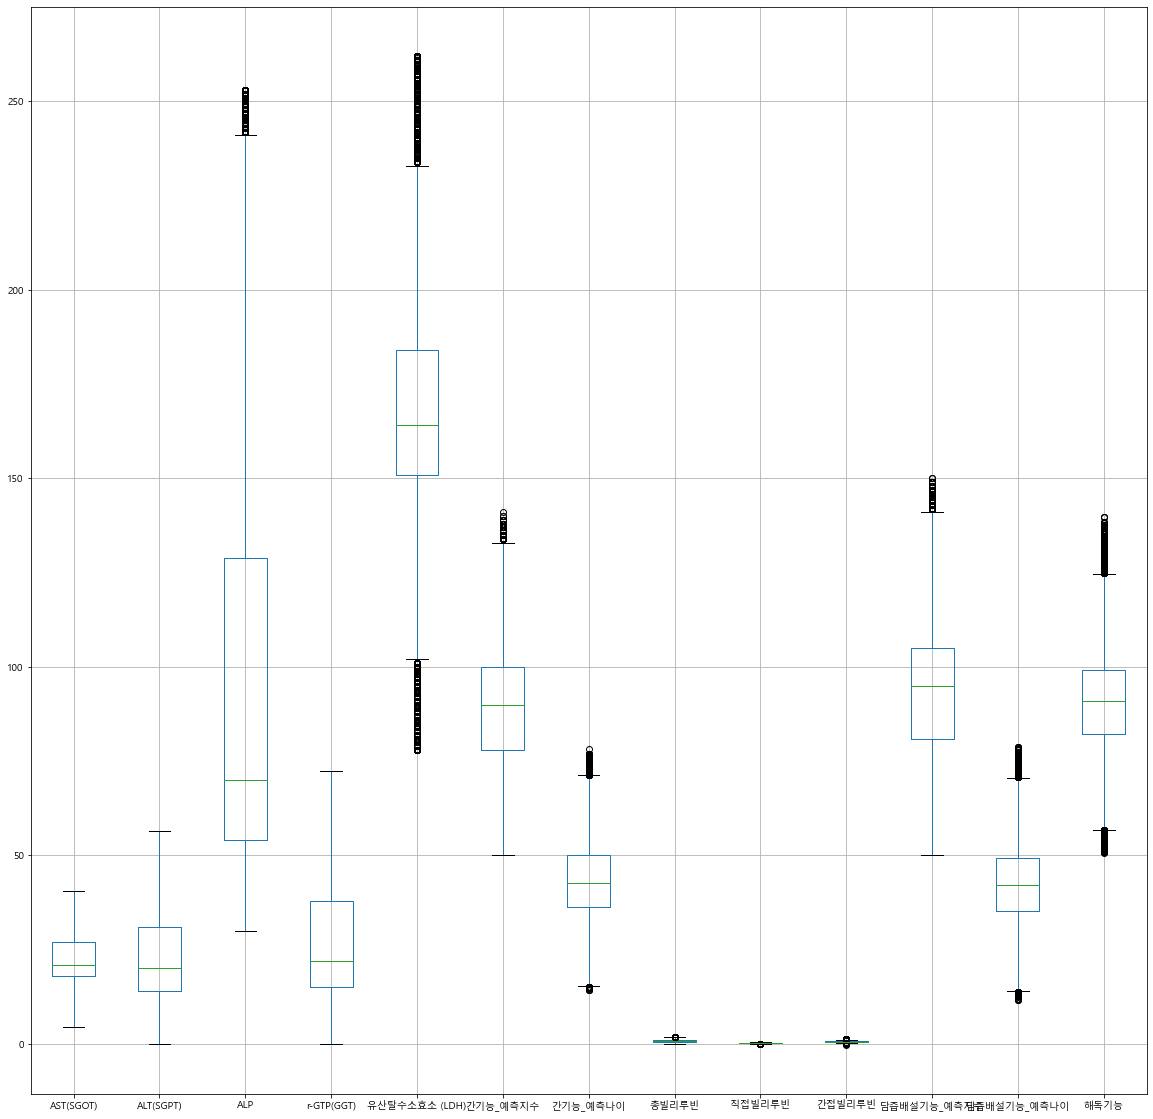

In [184]:
plt.rcParams["figure.figsize"] = (20, 20)
df_3.boxplot(column=lst)

<AxesSubplot:>

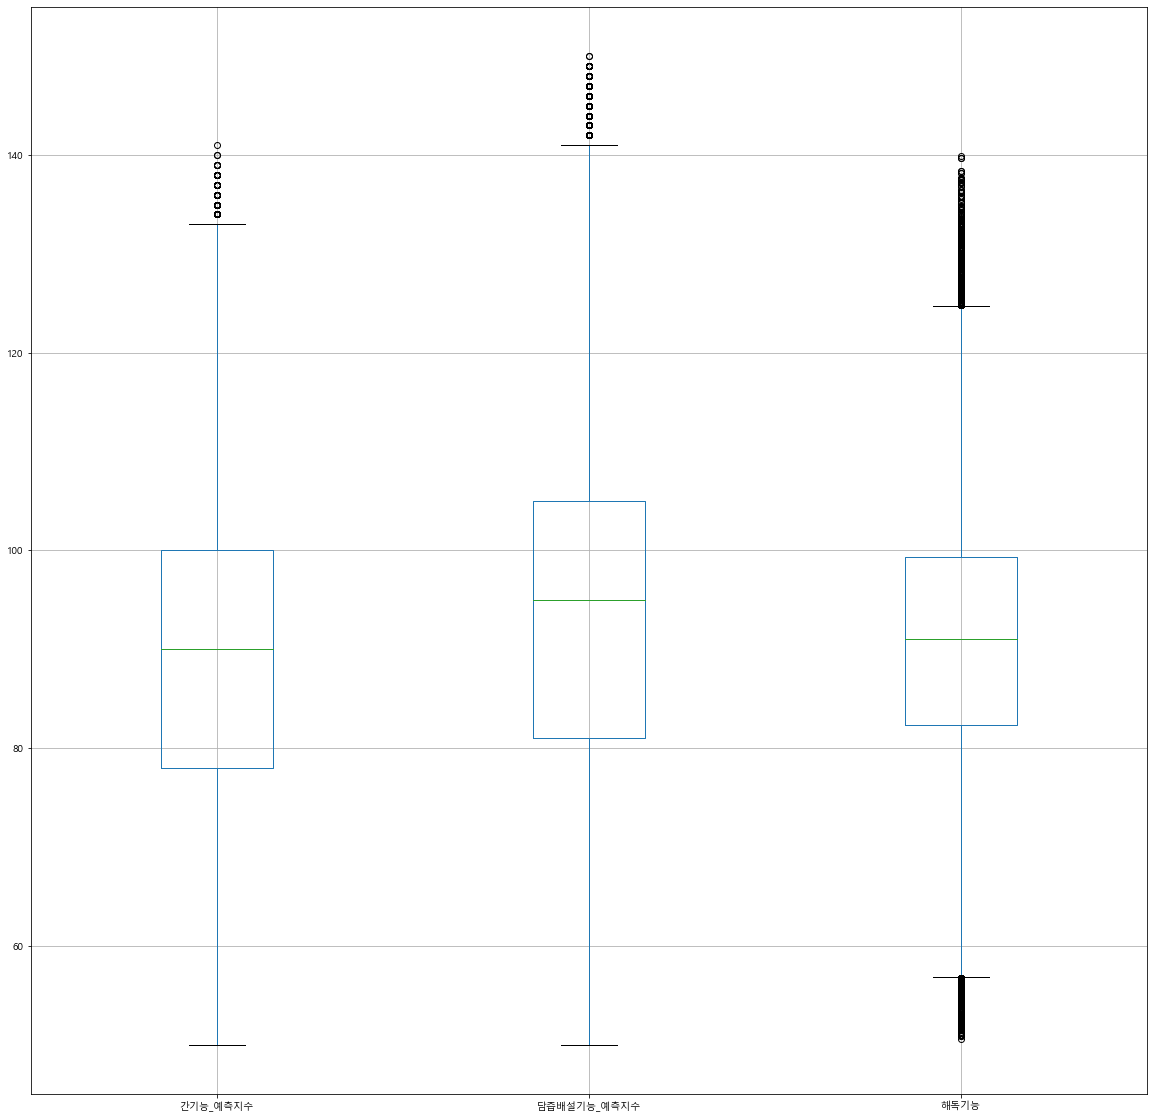

In [185]:
plt.rcParams["figure.figsize"] = (20, 20)
df_3.boxplot(column=[target_col, target_col2, target])

In [186]:
df_3.sort_values(by=target, inplace=True)

In [187]:
df_3.reset_index(drop=True, inplace=True)

In [188]:
df_3.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이,해독기능
0,2020,551603,463258,2,31,40.5,56.5,196.0,44.0,262.0,51.0,40.8,1.8,0.45,1.40,50.0,41.0,50.57
1,2024,951280,2568541,1,29,40.5,56.5,228.0,72.5,231.0,50.0,39.0,1.8,0.45,1.40,52.0,38.6,50.86
2,2019,168319,425282,1,29,40.5,55.0,253.0,72.5,221.0,50.0,39.0,1.8,0.45,1.30,52.0,38.6,50.86
3,2022,267796,1279075,2,48,40.5,56.5,90.0,72.5,262.0,51.0,57.8,1.7,0.45,1.20,51.0,57.8,51.00
4,2021,40096,670488,2,39,40.5,56.5,253.0,72.5,262.0,51.0,48.8,1.8,0.45,1.20,51.0,48.8,51.00
5,2019,156320,417363,2,37,40.5,56.5,216.0,37.0,262.0,51.0,46.8,1.8,0.45,1.40,51.0,46.8,51.00
6,2023,9774,2172429,2,39,40.5,56.5,253.0,64.0,232.0,51.0,48.8,1.8,0.45,1.40,51.0,48.8,51.00
7,2022,267796,1278489,2,48,40.5,56.5,90.0,72.5,262.0,51.0,57.8,1.7,0.45,1.20,51.0,57.8,51.00
8,2022,267796,1277926,2,48,40.5,56.5,90.0,72.5,262.0,51.0,57.8,1.7,0.45,1.20,51.0,57.8,51.00
9,2023,215739,1942967,2,49,40.5,56.5,221.0,52.0,262.0,51.0,58.8,1.8,0.45,1.30,51.0,58.8,51.00


In [189]:
df_3.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이,해독기능
count,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06
mean,2.021975e+03,5.015423e+05,1.472114e+06,1.366196e+00,4.096929e+01,2.320014e+01,2.432352e+01,9.568699e+01,2.920910e+01,1.738261e+02,8.891608e+01,4.318608e+01,8.756454e-01,2.578675e-01,6.098492e-01,9.309457e+01,4.235038e+01,9.070686e+01
std,1.568827e+00,3.602984e+05,8.006542e+05,4.817641e-01,8.830038e+00,7.584705e+00,1.373569e+01,5.905022e+01,1.900696e+01,3.863573e+01,1.540322e+01,9.433477e+00,3.458540e-01,9.807593e-02,2.398616e-01,1.872217e+01,9.613312e+00,1.223414e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.500000e+00,0.000000e+00,3.000000e+01,0.000000e+00,7.800000e+01,5.000000e+01,1.440000e+01,-1.200000e-01,5.000000e-02,-2.000000e-01,5.000000e+01,1.160000e+01,5.057000e+01
25%,2.021000e+03,2.200640e+05,6.586335e+05,1.000000e+00,3.400000e+01,1.800000e+01,1.400000e+01,5.400000e+01,1.500000e+01,1.510000e+02,7.800000e+01,3.620000e+01,6.000000e-01,2.000000e-01,5.000000e-01,8.100000e+01,3.520000e+01,8.229000e+01
50%,2.022000e+03,3.776520e+05,1.380132e+06,1.000000e+00,4.000000e+01,2.100000e+01,2.000000e+01,7.000000e+01,2.200000e+01,1.641500e+02,9.000000e+01,4.280000e+01,8.000000e-01,2.400000e-01,6.000000e-01,9.500000e+01,4.220000e+01,9.100000e+01
75%,2.023000e+03,8.259070e+05,2.168876e+06,2.000000e+00,4.800000e+01,2.700000e+01,3.100000e+01,1.290000e+02,3.800000e+01,1.840000e+02,1.000000e+02,5.020000e+01,1.080000e+00,3.000000e-01,7.000000e-01,1.050000e+02,4.940000e+01,9.929000e+01
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,4.050000e+01,5.650000e+01,2.530000e+02,7.250000e+01,2.620000e+02,1.410000e+02,7.820000e+01,1.800000e+00,4.500000e-01,1.400000e+00,1.500000e+02,7.880000e+01,1.398600e+02


In [190]:
df_3.reset_index(drop=True, inplace=True)

In [191]:
df_3[:1048576].to_excel('./output/'+ target +'.xlsx')
# df_3.to_excel('./output/' + target +'.xlsx')

In [192]:
df_3.to_csv('./output/' + target + '.csv')

# 심혈관기능

In [149]:
df_4_1 = pd.read_csv('../06.심혈관기능/output/심혈관기능_심장기능.csv', index_col=0)
df_4_2 = pd.read_csv('../06.심혈관기능/output/심혈관기능_혈관기능.csv', index_col=0)

In [150]:
target = '심혈관기능'

In [151]:
target_col = '심장기능_예측지수'
target_col2 = '혈관기능_예측지수'

## 중요도 ratio

In [152]:
target_cols_ratio = [2, 4,]

In [153]:
df_4_1.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,104.0,41.2
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0,66.0,45.8
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,80.0,40.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0,59.0,50.2
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0,80.0,42.0


In [154]:
df_4_2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총빌리루빈,직접빌리루빈,간접빌리루빈,예측지수,예측나이
0,2010,7282,2520,1,42,1.7,0.30,0.63,74.0,47.2
1,2010,7490,3638,1,39,0.9,0.30,0.60,95.0,40.0
2,2010,7915,3997,1,36,1.4,0.25,0.63,80.0,40.0
3,2010,8056,4745,1,42,0.7,0.20,0.63,102.0,41.6
4,2010,8457,3929,1,38,1.8,0.25,0.63,76.0,42.8


In [155]:
df_4_1.rename(columns={'예측지수':target_col}, inplace=True)
df_4_2.rename(columns={'예측지수':target_col2}, inplace=True)

In [156]:
df_4_1.rename(columns={'예측나이':'간기능_예측나이'}, inplace=True)
df_4_2.rename(columns={'예측나이':'담즙배설기능_예측나이'}, inplace=True)

## join

In [158]:
df_4 = pd.merge(df_4_1, df_4_2, on=['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이'], how='inner')

In [159]:
df_4.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,104.0,41.2,1.7,0.30,0.63,74.0,47.2
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0,66.0,45.8,0.9,0.30,0.60,95.0,40.0
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,80.0,40.0,1.4,0.25,0.63,80.0,40.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0,59.0,50.2,0.7,0.20,0.63,102.0,41.6
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0,80.0,42.0,1.8,0.25,0.63,76.0,42.8


In [160]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110351 entries, 0 to 1110350
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1110351 non-null  int64  
 1   UID            1110351 non-null  int64  
 2   CU_REC_ID      1110351 non-null  int64  
 3   SEX            1110351 non-null  int64  
 4   검진당시나이         1110351 non-null  int64  
 5   AST(SGOT)      1110351 non-null  float64
 6   ALT(SGPT)      1110351 non-null  float64
 7   ALP            1110351 non-null  float64
 8   r-GTP(GGT)     1110351 non-null  float64
 9   유산탈수소효소 (LDH)  1110351 non-null  float64
 10  간기능_예측지수       1110351 non-null  float64
 11  간기능_예측나이       1110351 non-null  float64
 12  총빌리루빈          1110351 non-null  float64
 13  직접빌리루빈         1110351 non-null  float64
 14  간접빌리루빈         1110351 non-null  float64
 15  담즙배설기능_예측지수    1110351 non-null  float64
 16  담즙배설기능_예측나이    1110351 non-null  float64
dtypes: float

## 스크리닝 50미만 150이상

In [161]:
min_value = 50
max_value = 150

### 간기능_예측지수

In [162]:
df_4[df_4[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [163]:
df_4.loc[df_4[target_col] < min_value, target_col] = min_value

In [164]:
df_4[df_4[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [165]:
df_4[df_4[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [166]:
df_4.loc[df_4[target_col] > max_value, target_col] = max_value

In [167]:
df_4[df_4[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


### 담즙배설기능_예측지수

In [168]:
df_4[df_4[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이
153494,2021,165948,566168,1,23,7.0,9.0,53.0,11.0,156.0,129.0,17.2,1.8,0.45,1.2,49.0,33.2
207092,2021,450029,601576,1,23,15.0,13.0,223.0,19.0,262.0,94.0,24.2,1.8,0.45,1.1,49.0,33.2
677053,2024,864698,2832624,1,23,40.5,38.0,180.0,15.0,157.0,74.0,28.2,1.8,0.45,1.2,49.0,33.2


In [169]:
df_4.loc[df_4[target_col2] < min_value, target_col2] = min_value

In [170]:
df_4[df_4[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


In [171]:
df_4[df_4[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이
841213,2021,844375,831559,2,28,15.0,11.0,54.0,13.0,131.0,103.0,27.4,0.1,0.05,0.1,151.0,17.8


In [172]:
df_4.loc[df_4[target_col2] > max_value, target_col2] = max_value

In [173]:
df_4[df_4[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이


## 해독기능 계산

In [174]:
target_col, df_4[target_col].min(), df_4[target_col].max() 

('간기능_예측지수', 50.0, 141.0)

In [175]:
target_col2, df_4[target_col2].min(), df_4[target_col2].max() 

('담즙배설기능_예측지수', 50.0, 150.0)

In [176]:
df_4[target] = (
      (target_cols_ratio[0] * df_4[target_col])
    + (target_cols_ratio[1] * df_4[target_col2])          
) / sum(target_cols_ratio)

In [177]:
df_4[target] = np.round(df_4[target], 2)

In [178]:
df_4[target].min()

50.57

In [179]:
df_4[target].max()

139.86

In [180]:
df_4.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이,해독기능
count,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06
mean,2.021975e+03,5.015423e+05,1.472114e+06,1.366196e+00,4.096929e+01,2.320014e+01,2.432352e+01,9.568699e+01,2.920910e+01,1.738261e+02,8.891608e+01,4.318608e+01,8.756454e-01,2.578675e-01,6.098492e-01,9.309457e+01,4.235038e+01,9.070686e+01
std,1.568827e+00,3.602984e+05,8.006542e+05,4.817641e-01,8.830038e+00,7.584705e+00,1.373569e+01,5.905022e+01,1.900696e+01,3.863573e+01,1.540322e+01,9.433477e+00,3.458540e-01,9.807593e-02,2.398616e-01,1.872217e+01,9.613312e+00,1.223414e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.500000e+00,0.000000e+00,3.000000e+01,0.000000e+00,7.800000e+01,5.000000e+01,1.440000e+01,-1.200000e-01,5.000000e-02,-2.000000e-01,5.000000e+01,1.160000e+01,5.057000e+01
25%,2.021000e+03,2.200640e+05,6.586335e+05,1.000000e+00,3.400000e+01,1.800000e+01,1.400000e+01,5.400000e+01,1.500000e+01,1.510000e+02,7.800000e+01,3.620000e+01,6.000000e-01,2.000000e-01,5.000000e-01,8.100000e+01,3.520000e+01,8.229000e+01
50%,2.022000e+03,3.776520e+05,1.380132e+06,1.000000e+00,4.000000e+01,2.100000e+01,2.000000e+01,7.000000e+01,2.200000e+01,1.641500e+02,9.000000e+01,4.280000e+01,8.000000e-01,2.400000e-01,6.000000e-01,9.500000e+01,4.220000e+01,9.100000e+01
75%,2.023000e+03,8.259070e+05,2.168876e+06,2.000000e+00,4.800000e+01,2.700000e+01,3.100000e+01,1.290000e+02,3.800000e+01,1.840000e+02,1.000000e+02,5.020000e+01,1.080000e+00,3.000000e-01,7.000000e-01,1.050000e+02,4.940000e+01,9.929000e+01
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,4.050000e+01,5.650000e+01,2.530000e+02,7.250000e+01,2.620000e+02,1.410000e+02,7.820000e+01,1.800000e+00,4.500000e-01,1.400000e+00,1.500000e+02,7.880000e+01,1.398600e+02


In [181]:
df_4.columns[5:].tolist()

['AST(SGOT)',
 'ALT(SGPT)',
 'ALP',
 'r-GTP(GGT)',
 '유산탈수소효소 (LDH)',
 '간기능_예측지수',
 '간기능_예측나이',
 '총빌리루빈',
 '직접빌리루빈',
 '간접빌리루빈',
 '담즙배설기능_예측지수',
 '담즙배설기능_예측나이',
 '해독기능']

In [182]:
lst = df_4.columns[5:].tolist()

<AxesSubplot:>

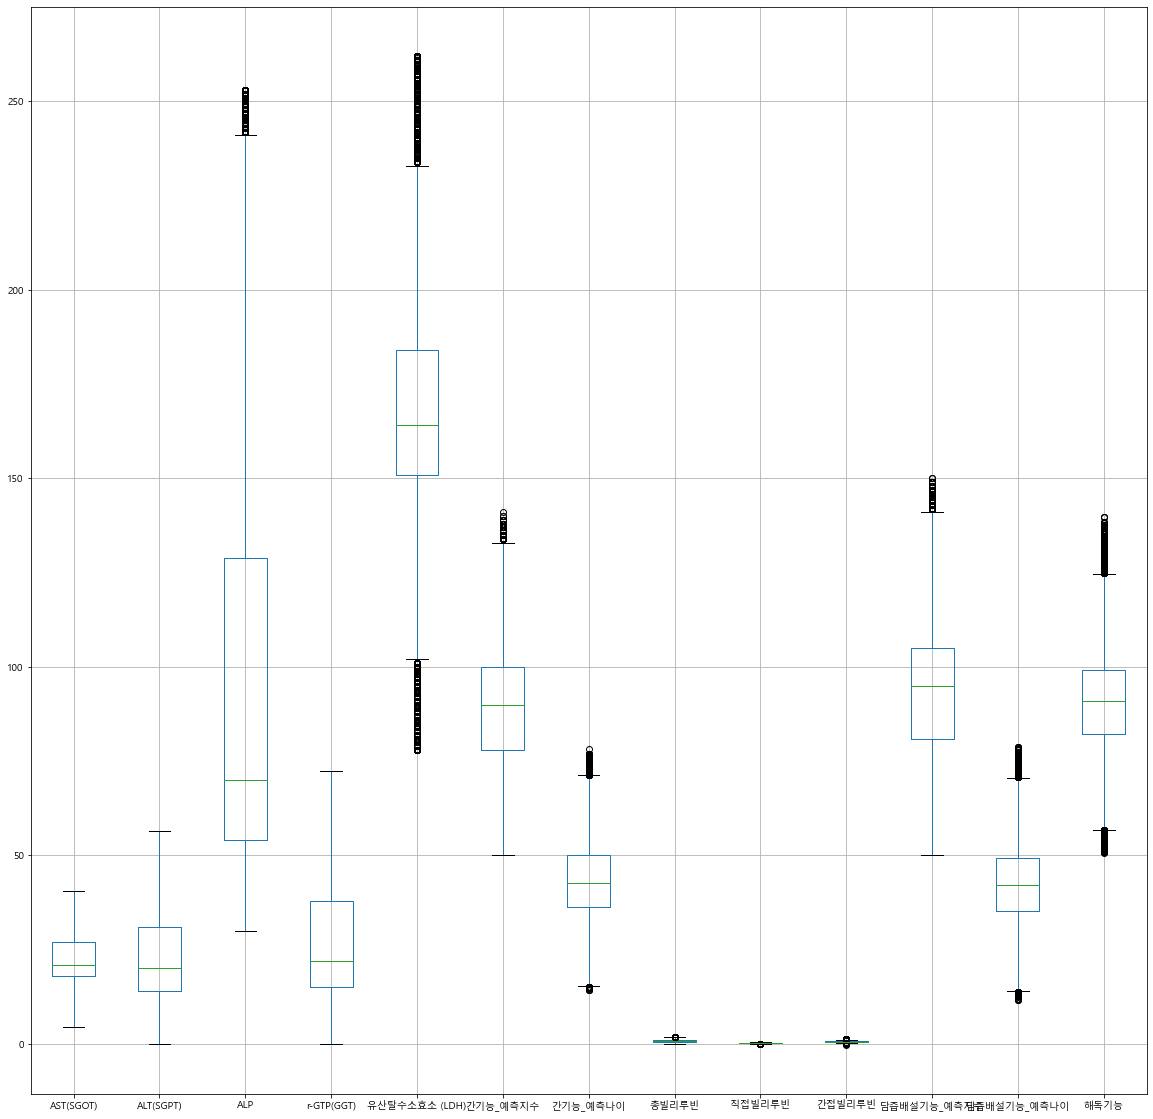

In [184]:
plt.rcParams["figure.figsize"] = (20, 20)
df_4.boxplot(column=lst)

<AxesSubplot:>

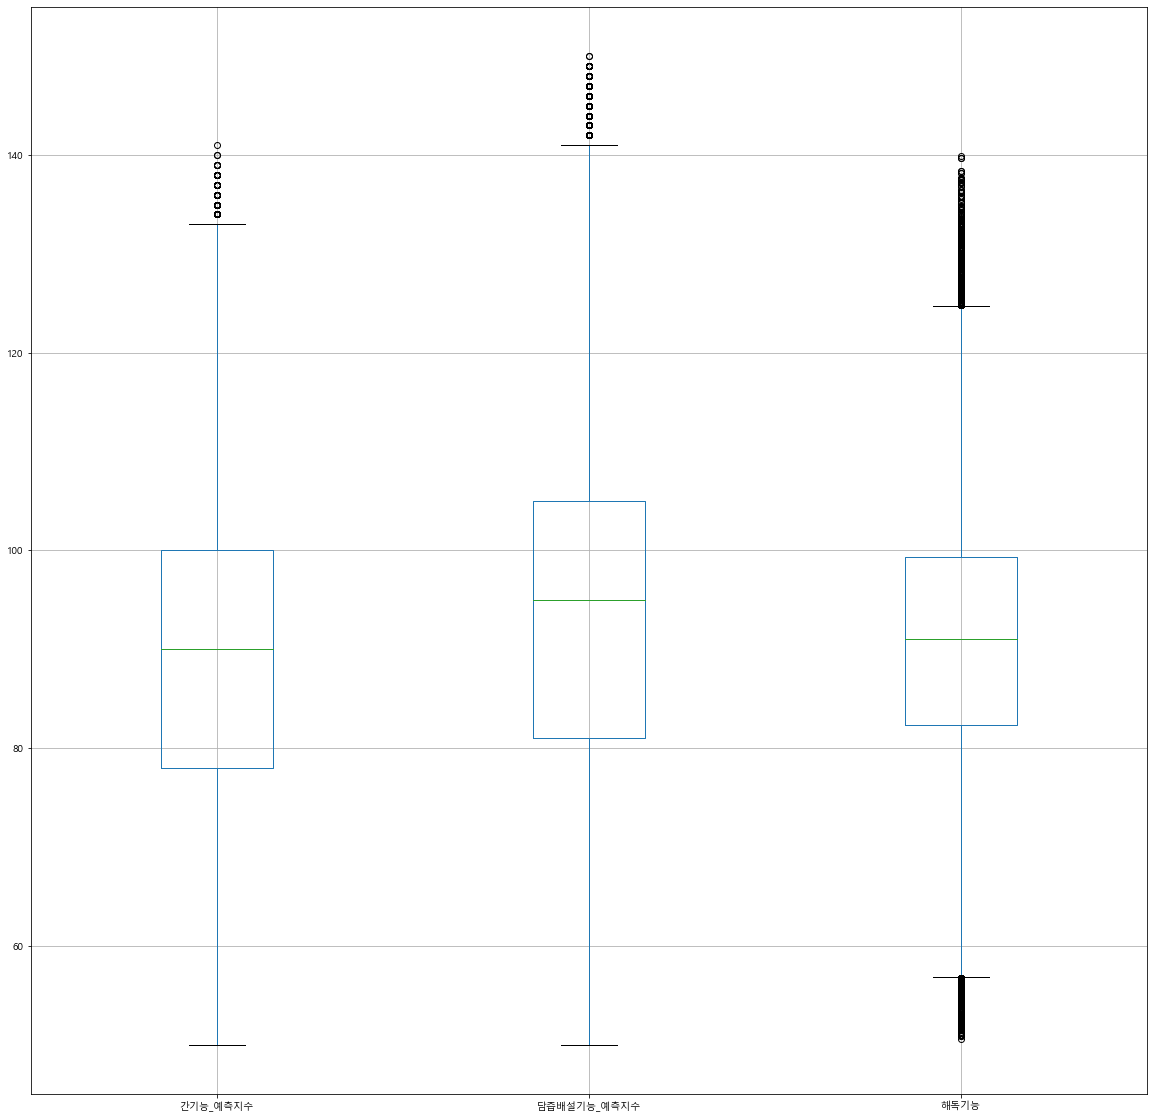

In [185]:
plt.rcParams["figure.figsize"] = (20, 20)
df_4.boxplot(column=[target_col, target_col2, target])

In [186]:
df_4.sort_values(by=target, inplace=True)

In [187]:
df_4.reset_index(drop=True, inplace=True)

In [188]:
df_4.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이,해독기능
0,2020,551603,463258,2,31,40.5,56.5,196.0,44.0,262.0,51.0,40.8,1.8,0.45,1.40,50.0,41.0,50.57
1,2024,951280,2568541,1,29,40.5,56.5,228.0,72.5,231.0,50.0,39.0,1.8,0.45,1.40,52.0,38.6,50.86
2,2019,168319,425282,1,29,40.5,55.0,253.0,72.5,221.0,50.0,39.0,1.8,0.45,1.30,52.0,38.6,50.86
3,2022,267796,1279075,2,48,40.5,56.5,90.0,72.5,262.0,51.0,57.8,1.7,0.45,1.20,51.0,57.8,51.00
4,2021,40096,670488,2,39,40.5,56.5,253.0,72.5,262.0,51.0,48.8,1.8,0.45,1.20,51.0,48.8,51.00
5,2019,156320,417363,2,37,40.5,56.5,216.0,37.0,262.0,51.0,46.8,1.8,0.45,1.40,51.0,46.8,51.00
6,2023,9774,2172429,2,39,40.5,56.5,253.0,64.0,232.0,51.0,48.8,1.8,0.45,1.40,51.0,48.8,51.00
7,2022,267796,1278489,2,48,40.5,56.5,90.0,72.5,262.0,51.0,57.8,1.7,0.45,1.20,51.0,57.8,51.00
8,2022,267796,1277926,2,48,40.5,56.5,90.0,72.5,262.0,51.0,57.8,1.7,0.45,1.20,51.0,57.8,51.00
9,2023,215739,1942967,2,49,40.5,56.5,221.0,52.0,262.0,51.0,58.8,1.8,0.45,1.30,51.0,58.8,51.00


In [189]:
df_4.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),간기능_예측지수,간기능_예측나이,총빌리루빈,직접빌리루빈,간접빌리루빈,담즙배설기능_예측지수,담즙배설기능_예측나이,해독기능
count,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06,1.110351e+06
mean,2.021975e+03,5.015423e+05,1.472114e+06,1.366196e+00,4.096929e+01,2.320014e+01,2.432352e+01,9.568699e+01,2.920910e+01,1.738261e+02,8.891608e+01,4.318608e+01,8.756454e-01,2.578675e-01,6.098492e-01,9.309457e+01,4.235038e+01,9.070686e+01
std,1.568827e+00,3.602984e+05,8.006542e+05,4.817641e-01,8.830038e+00,7.584705e+00,1.373569e+01,5.905022e+01,1.900696e+01,3.863573e+01,1.540322e+01,9.433477e+00,3.458540e-01,9.807593e-02,2.398616e-01,1.872217e+01,9.613312e+00,1.223414e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,4.500000e+00,0.000000e+00,3.000000e+01,0.000000e+00,7.800000e+01,5.000000e+01,1.440000e+01,-1.200000e-01,5.000000e-02,-2.000000e-01,5.000000e+01,1.160000e+01,5.057000e+01
25%,2.021000e+03,2.200640e+05,6.586335e+05,1.000000e+00,3.400000e+01,1.800000e+01,1.400000e+01,5.400000e+01,1.500000e+01,1.510000e+02,7.800000e+01,3.620000e+01,6.000000e-01,2.000000e-01,5.000000e-01,8.100000e+01,3.520000e+01,8.229000e+01
50%,2.022000e+03,3.776520e+05,1.380132e+06,1.000000e+00,4.000000e+01,2.100000e+01,2.000000e+01,7.000000e+01,2.200000e+01,1.641500e+02,9.000000e+01,4.280000e+01,8.000000e-01,2.400000e-01,6.000000e-01,9.500000e+01,4.220000e+01,9.100000e+01
75%,2.023000e+03,8.259070e+05,2.168876e+06,2.000000e+00,4.800000e+01,2.700000e+01,3.100000e+01,1.290000e+02,3.800000e+01,1.840000e+02,1.000000e+02,5.020000e+01,1.080000e+00,3.000000e-01,7.000000e-01,1.050000e+02,4.940000e+01,9.929000e+01
max,2.024000e+03,1.473602e+06,2.871357e+06,2.000000e+00,6.900000e+01,4.050000e+01,5.650000e+01,2.530000e+02,7.250000e+01,2.620000e+02,1.410000e+02,7.820000e+01,1.800000e+00,4.500000e-01,1.400000e+00,1.500000e+02,7.880000e+01,1.398600e+02


In [190]:
df_4.reset_index(drop=True, inplace=True)

In [191]:
df_4[:1048576].to_excel('./output/'+ target +'.xlsx')
# df_4.to_excel('./output/' + target +'.xlsx')

In [192]:
df_4.to_csv('./output/' + target + '.csv')

# 면역기능

In [194]:
df_5_1 = pd.read_csv('../02.면역기능/output/면역기능_면역세포생성기능.csv', index_col=0)
df_5_2 = pd.read_csv('../02.면역기능/output/면역기능_항체생성.csv', index_col=0)

In [195]:
target = '면역기능'

In [196]:
target_col = '면역세포생성기능_예측지수'
target_col2 = '항체생성_예측지수'

## 중요도 ratio

In [197]:
target_cols_ratio = [4, 2]

In [198]:
df_5_1.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,예측지수,예측나이
0,2010,7282,2520,1,42,6.56,46.5,42.0,1.1,9.9,0.5,0.90,11.5,97.0,42.6
1,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0,1.17,11.0,111.0,36.8
2,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6,3.00,8.9,95.0,37.0
3,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0,1.28,11.0,109.0,40.2
4,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1,0.98,8.5,96.0,38.8


In [199]:
df_5_2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,글로블린,예측지수,예측나이
0,2010,7490,3638,1,39,2.4,128.0,33.4
1,2010,7915,3997,1,36,3.0,119.0,32.2
2,2010,8056,4745,1,42,2.5,150.0,32.0
3,2010,8457,3929,1,38,3.1,96.0,38.8
4,2010,8634,4751,1,43,2.5,148.0,33.4


In [200]:
df_5_1.rename(columns={'예측지수':target_col}, inplace=True)
df_5_2.rename(columns={'예측지수':target_col2}, inplace=True)

In [201]:
df_5_1.rename(columns={'예측나이':'간기능_예측나이'}, inplace=True)
df_5_2.rename(columns={'예측나이':'담즙배설기능_예측나이'}, inplace=True)

## join

In [202]:
df_5 = pd.merge(df_5_1, df_5_2, on=['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이'], how='inner')

In [203]:
df_5.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이
0,2010,7490,3638,1,39,6.50,41.0,48.0,3.0,8.0,0.0,1.17,11.0,111.0,36.8,2.4,128.0,33.4
1,2010,7915,3997,1,36,5.14,22.8,68.3,2.1,6.2,0.6,3.00,8.9,95.0,37.0,3.0,119.0,32.2
2,2010,8056,4745,1,42,7.00,39.0,50.0,3.0,8.0,0.0,1.28,11.0,109.0,40.2,2.5,150.0,32.0
3,2010,8457,3929,1,38,7.01,46.2,45.3,2.4,6.0,0.1,0.98,8.5,96.0,38.8,3.1,96.0,38.8
4,2010,8634,4751,1,43,9.80,21.0,72.0,1.0,6.0,0.0,3.43,7.0,58.0,51.4,2.5,148.0,33.4


In [204]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962693 entries, 0 to 962692
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   검진년도                  962693 non-null  int64  
 1   UID                   962693 non-null  int64  
 2   CU_REC_ID             962693 non-null  int64  
 3   SEX                   962693 non-null  int64  
 4   검진당시나이                962693 non-null  int64  
 5   백혈구(WBC)              962693 non-null  float64
 6   림프구 (Lymphocyte)      962693 non-null  float64
 7   분획호중구 (Seg Neutroph)  962693 non-null  float64
 8   호산구 (Eosinophil)      962693 non-null  float64
 9   단핵구 (Monocyte)        962693 non-null  float64
 10  호염기구 (Basophil)       962693 non-null  float64
 11  NLR                   962693 non-null  float64
 12  EBM                   962693 non-null  float64
 13  면역세포생성기능_예측지수         962693 non-null  float64
 14  간기능_예측나이              962693 non-null  float64
 15  

## 스크리닝 50미만 150이상

In [205]:
min_value = 50
max_value = 150

### 면역세포생성기능_예측지수

In [206]:
df_5[df_5[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이
611047,2019,122616,334886,2,50,9.8,14.15,77.1,0.0,2.5,0.0,5.45,2.5,49.0,60.2,2.6,150.0,40.0
613539,2019,147299,546529,2,31,9.5,14.15,77.1,0.0,2.5,0.3,5.45,2.8,49.0,41.2,2.9,120.0,27.0
647412,2020,137761,737205,2,48,9.8,14.15,77.1,0.0,2.5,0.0,5.45,2.5,49.0,58.2,2.6,150.0,38.0
647420,2020,137761,527240,2,48,9.8,14.15,77.1,0.0,2.5,0.0,5.45,2.5,49.0,58.2,2.6,150.0,38.0
653286,2020,202068,445830,2,36,9.8,14.15,77.1,0.0,2.5,0.1,5.45,2.6,49.0,46.2,2.9,126.0,30.8


In [207]:
df_5.loc[df_5[target_col] < min_value, target_col] = min_value

In [208]:
df_5[df_5[target_col] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이


In [209]:
df_5[df_5[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이


In [210]:
df_5.loc[df_5[target_col] > max_value, target_col] = max_value

In [211]:
df_5[df_5[target_col] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이


### 항체생성_예측지수

In [212]:
df_5[df_5[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이
626039,2019,300627,429617,2,49,6.68,39.5,51.0,1.80,7.0,0.7,1.29,9.50,107.0,47.6,1.15,49.0,59.2
661837,2020,300627,460092,2,50,6.95,36.7,54.1,1.40,7.2,0.6,1.47,9.20,109.0,48.2,1.15,49.0,60.2
667802,2020,377605,460094,2,48,5.94,38.0,47.0,7.10,7.1,0.8,1.24,15.00,101.0,47.8,1.15,49.0,58.2
670905,2020,444067,442548,2,52,5.42,35.2,46.9,7.65,5.9,1.3,1.33,14.85,108.0,50.4,1.15,48.0,62.4
962513,2024,1297364,2444304,2,57,4.00,43.5,47.7,1.80,6.3,0.7,1.10,8.80,107.0,55.6,1.15,49.0,67.2


In [213]:
df_5.loc[df_5[target_col2] < min_value, target_col2] = min_value

In [214]:
df_5[df_5[target_col2] < min_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이


In [215]:
df_5[df_5[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이
10708,2019,147768,1471598,1,52,5.70,31.7,52.7,5.50,9.4,0.70,1.66,15.60,107.0,50.6,2.64,151.0,41.8
10725,2019,147768,408819,1,52,5.70,31.7,52.7,5.50,9.4,0.70,1.66,15.60,107.0,50.6,2.64,151.0,41.8
58026,2020,43215,442289,1,52,9.80,23.6,69.4,2.75,7.1,0.63,2.94,10.48,67.0,58.6,2.64,151.0,41.8
61821,2020,129166,465604,1,50,5.00,39.0,50.8,1.40,7.8,1.00,1.30,10.20,122.0,45.6,2.65,151.0,39.8
72002,2020,200969,477877,1,53,5.97,33.5,56.0,1.50,7.7,1.30,1.67,10.50,115.0,50.0,2.46,151.0,42.8


In [216]:
df_5.loc[df_5[target_col2] > max_value, target_col2] = max_value

In [217]:
df_5[df_5[target_col2] > max_value].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이


## 면역기능 계산

In [218]:
target_col, df_5[target_col].min(), df_5[target_col].max() 

('면역세포생성기능_예측지수', 50.0, 126.0)

In [219]:
target_col2, df_5[target_col2].min(), df_5[target_col2].max() 

('항체생성_예측지수', 50.0, 150.0)

In [220]:
df_5[target] = (
      (target_cols_ratio[0] * df_5[target_col])
    + (target_cols_ratio[1] * df_5[target_col2])          
) / sum(target_cols_ratio)

In [221]:
df_5[target] = np.round(df_5[target], 2)

In [222]:
df_5[target].min()

51.67

In [223]:
df_5[target].max()

134.0

In [224]:
df_5.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이,면역기능
count,962693.000000,9.626930e+05,9.626930e+05,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000
mean,2022.005130,5.086711e+05,1.488182e+06,1.369340,40.631929,5.983583,34.390771,55.174230,2.900169,6.942322,0.637576,1.748422,10.466307,99.891688,40.653605,2.641274,121.615785,36.308768,107.133052
std,1.547372,3.654444e+05,8.005222e+05,0.482626,8.833709,1.631053,7.490473,7.390957,1.968181,1.648720,0.357777,0.655985,2.735244,14.150163,9.277793,0.356650,26.449268,10.315550,13.000441
min,2010.000000,3.200000e+01,1.430000e+02,1.000000,20.000000,1.800000,14.150000,33.100000,-2.350000,2.500000,-0.350000,0.610000,-0.200000,50.000000,15.200000,1.150000,50.000000,10.000000,51.670000
25%,2021.000000,2.213380e+05,6.701750e+05,1.000000,34.000000,4.800000,29.500000,51.160000,1.500000,5.900000,0.400000,1.360000,8.600000,91.000000,33.600000,2.400000,107.000000,28.600000,98.670000
50%,2022.000000,3.803870e+05,1.389792e+06,1.000000,40.000000,5.700000,34.400000,54.660000,2.300000,6.900000,0.600000,1.690000,10.200000,102.000000,40.200000,2.600000,128.000000,35.600000,108.670000
75%,2023.000000,8.346740e+05,2.186314e+06,2.000000,47.000000,6.820000,39.200000,59.000000,3.800000,8.000000,0.900000,1.910000,12.000000,111.000000,47.400000,2.900000,144.000000,43.400000,117.000000
max,2024.000000,1.473602e+06,2.871357e+06,2.000000,69.000000,9.800000,54.550000,77.100000,7.650000,11.300000,1.650000,5.450000,20.600000,126.000000,78.800000,3.500000,150.000000,78.400000,134.000000


In [225]:
df_5.columns[5:].tolist()

['백혈구(WBC)',
 '림프구 (Lymphocyte)',
 '분획호중구 (Seg Neutroph)',
 '호산구 (Eosinophil)',
 '단핵구 (Monocyte)',
 '호염기구 (Basophil)',
 'NLR',
 'EBM',
 '면역세포생성기능_예측지수',
 '간기능_예측나이',
 '글로블린',
 '항체생성_예측지수',
 '담즙배설기능_예측나이',
 '면역기능']

In [226]:
lst = df_5.columns[5:].tolist()

<AxesSubplot:>

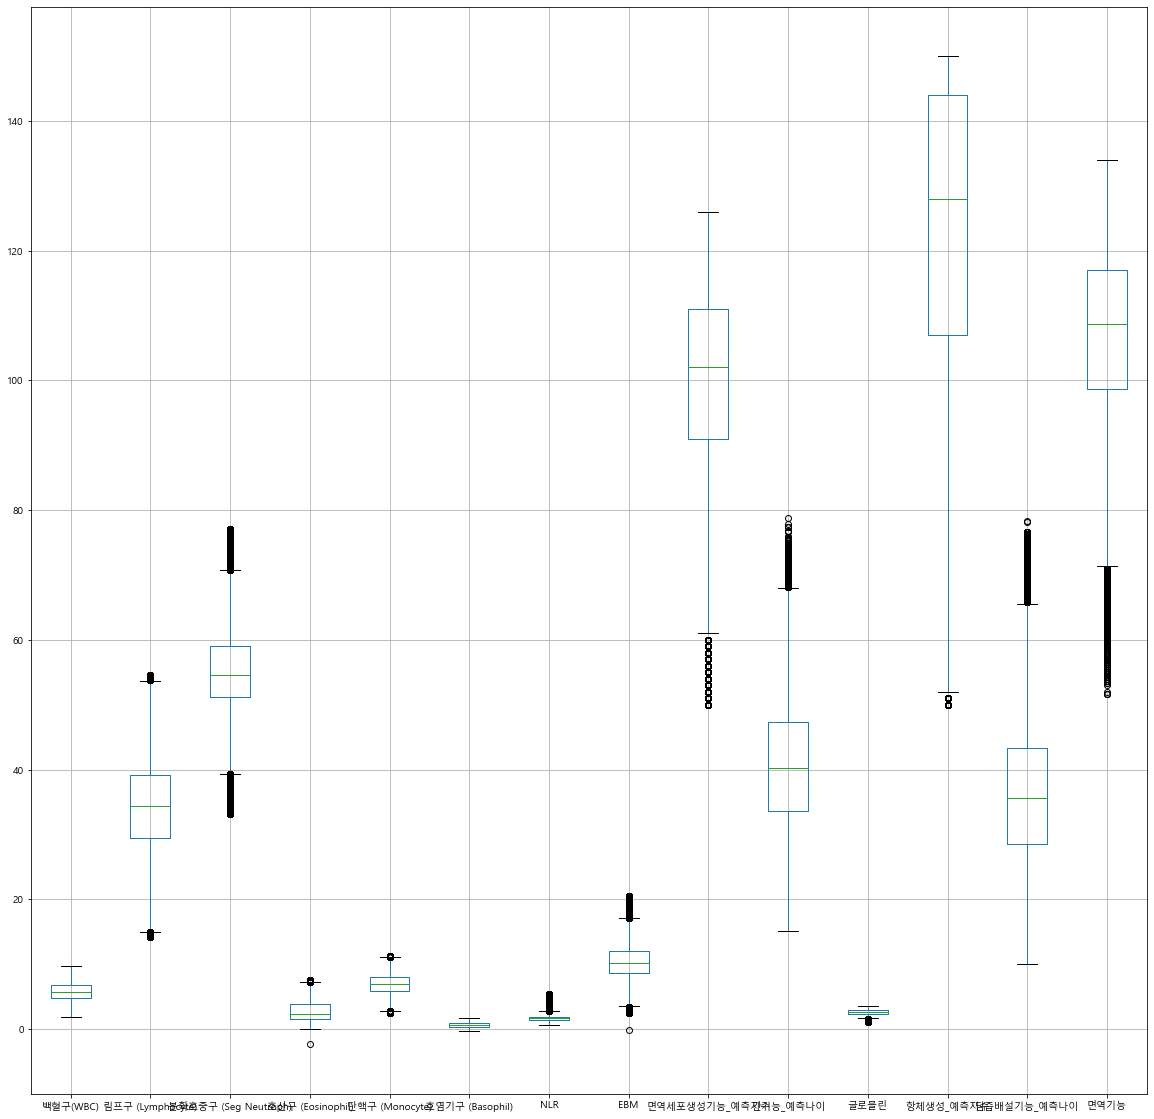

In [227]:
plt.rcParams["figure.figsize"] = (20, 20)
df_5.boxplot(column=lst)

<AxesSubplot:>

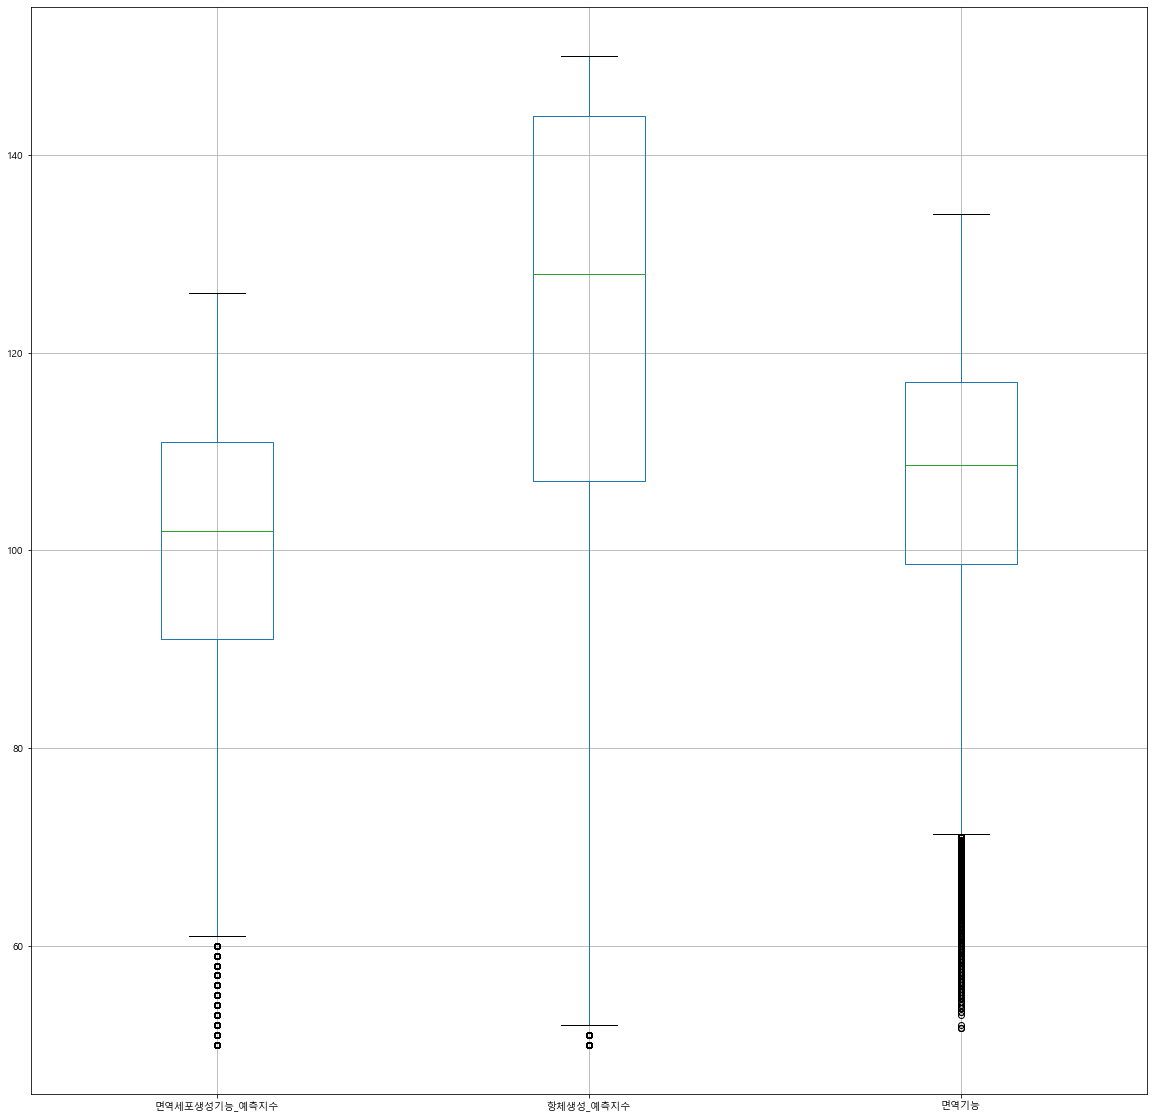

In [228]:
plt.rcParams["figure.figsize"] = (20, 20)
df_5.boxplot(column=[target_col, target_col2, target])

In [229]:
df_5.sort_values(by=target, inplace=True)

In [230]:
df_5.reset_index(drop=True, inplace=True)

In [231]:
df_5.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이,면역기능
0,2023,1216960,1734346,1,53,9.80,14.15,77.1,0.2,2.7,0.4,5.45,3.3,52.0,62.6,1.70,51.0,62.8,51.67
1,2023,1216960,2192030,1,53,9.80,14.15,77.1,0.2,2.7,0.4,5.45,3.3,52.0,62.6,1.70,51.0,62.8,51.67
2,2023,1216960,2695509,1,53,9.80,14.15,77.1,0.2,2.7,0.4,5.45,3.3,52.0,62.6,1.70,51.0,62.8,51.67
3,2024,1205688,2750669,1,28,9.80,14.15,77.1,0.3,4.5,0.3,5.45,5.1,52.0,37.6,1.70,52.0,37.6,52.00
4,2024,1264447,2402048,1,25,9.80,16.90,77.1,1.0,4.3,0.4,4.56,5.7,52.0,34.6,3.50,55.0,34.0,53.00
5,2020,279685,455103,2,26,9.80,14.15,77.1,0.1,2.5,0.2,5.45,2.8,50.0,36.2,3.40,60.0,34.0,53.33
6,2024,1157691,2709551,1,26,9.80,14.15,77.1,1.7,3.0,0.7,5.45,5.4,53.0,35.4,3.50,54.0,35.2,53.33
7,2024,1420352,2488612,1,30,9.80,17.00,77.1,0.5,4.8,0.3,4.54,5.6,52.0,39.6,1.80,57.0,38.6,53.67
8,2022,856409,1153372,1,28,9.80,15.00,77.1,0.2,2.9,0.4,5.14,3.5,52.0,37.6,3.50,57.0,36.6,53.67
9,2021,298000,589262,1,31,9.80,14.15,77.1,0.0,3.6,0.1,5.45,3.7,52.0,40.6,3.50,57.0,39.6,53.67


In [232]:
df_5.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,백혈구(WBC),림프구 (Lymphocyte),분획호중구 (Seg Neutroph),호산구 (Eosinophil),단핵구 (Monocyte),호염기구 (Basophil),NLR,EBM,면역세포생성기능_예측지수,간기능_예측나이,글로블린,항체생성_예측지수,담즙배설기능_예측나이,면역기능
count,962693.000000,9.626930e+05,9.626930e+05,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000,962693.000000
mean,2022.005130,5.086711e+05,1.488182e+06,1.369340,40.631929,5.983583,34.390771,55.174230,2.900169,6.942322,0.637576,1.748422,10.466307,99.891688,40.653605,2.641274,121.615785,36.308768,107.133052
std,1.547372,3.654444e+05,8.005222e+05,0.482626,8.833709,1.631053,7.490473,7.390957,1.968181,1.648720,0.357777,0.655985,2.735244,14.150163,9.277793,0.356650,26.449268,10.315550,13.000441
min,2010.000000,3.200000e+01,1.430000e+02,1.000000,20.000000,1.800000,14.150000,33.100000,-2.350000,2.500000,-0.350000,0.610000,-0.200000,50.000000,15.200000,1.150000,50.000000,10.000000,51.670000
25%,2021.000000,2.213380e+05,6.701750e+05,1.000000,34.000000,4.800000,29.500000,51.160000,1.500000,5.900000,0.400000,1.360000,8.600000,91.000000,33.600000,2.400000,107.000000,28.600000,98.670000
50%,2022.000000,3.803870e+05,1.389792e+06,1.000000,40.000000,5.700000,34.400000,54.660000,2.300000,6.900000,0.600000,1.690000,10.200000,102.000000,40.200000,2.600000,128.000000,35.600000,108.670000
75%,2023.000000,8.346740e+05,2.186314e+06,2.000000,47.000000,6.820000,39.200000,59.000000,3.800000,8.000000,0.900000,1.910000,12.000000,111.000000,47.400000,2.900000,144.000000,43.400000,117.000000
max,2024.000000,1.473602e+06,2.871357e+06,2.000000,69.000000,9.800000,54.550000,77.100000,7.650000,11.300000,1.650000,5.450000,20.600000,126.000000,78.800000,3.500000,150.000000,78.400000,134.000000


In [233]:
df_5.reset_index(drop=True, inplace=True)

In [234]:
df_5[:1048576].to_excel('./output/'+ target +'.xlsx')
# df_5.to_excel('./output/' + target +'.xlsx')

In [235]:
df_5.to_csv('./output/' + target + '.csv')